In [1]:
import numpy as np
from pyESN import ESN
from matplotlib import pyplot as plt
import random

def get_data(x0):
    r = 4
    x = []
    x.append(x0)
    for i in range(1,1100):
        x1=x0*r*(1-x0)
        x0=x1
        x.append(x1)
    x=np.asarray(x)
    return(x)

menor = np.loadtxt("esn_big_minstable_r4_x0.1_d1000.csv", delimiter=",")
list_of_x0 = np.loadtxt("esn_random_x0.1_r4.csv", delimiter=" ")

print(menor.shape)

(11032, 4)


In [2]:


def turnintoarray(erro_list,d):
    erro_array = np.asarray(erro_list).reshape(int(len(erro_list)),d)
    return erro_array

    
def geterrors(FUTUREerror):
    
    a = abs(FUTUREerror)
    b = FUTUREerror**2
    
    mae = []
    mse = []
    rmse = []
    
    for i in range(FUTUREerror.shape[1]):
        mae.append(np.sum(a,axis=0)[i]/FUTUREerror.shape[0])
        mse.append(np.sum(b,axis=0)[i]/FUTUREerror.shape[0])
        rmse.append(np.sqrt(np.sum(b,axis=0)[i]/FUTUREerror.shape[0]))
        
   
    
    return mae,mse,rmse

In [3]:


future_error = []

for i in range(menor.shape[0]):
    data = get_data(list_of_x0[i])
    
    future_t = np.zeros((10))
    esn = ESN(n_inputs = 1,
        n_outputs = 1,
      n_reservoir = int(menor[i][1]),
      spectral_radius = menor[i][2],
      random_state=42)
    trainlen = 1000
    future = 10
    pred_training = esn.fit(np.ones(trainlen),data[0:trainlen])

    prediction = esn.predict(np.ones(future))
    error = np.sqrt(np.mean((prediction.flatten() - data[trainlen:trainlen+future])**2))
    print(i,'test error:',error)
   
    future_error.append(prediction.flatten()-data[trainlen:trainlen+future])
   
    
    
    

0 test error: 0.0005886494719325228
1 test error: 0.007803608016605303
2 test error: 0.0009746266380366917
3 test error: 0.00908744063726895
4 test error: 0.001689452596833046
5 test error: 0.002352393763440707
6 test error: 0.0012323668994560254
7 test error: 0.0023316127522795584
8 test error: 0.0012344179444064537
9 test error: 0.0010567337147994271
10 test error: 0.01686787354265514
11 test error: 0.0012956028083508022
12 test error: 0.002418737001072495
13 test error: 0.001740997634595691
14 test error: 0.006526864340008716
15 test error: 0.009015791187896438
16 test error: 0.0066306223399855745
17 test error: 0.0007409088667944231
18 test error: 0.0007738097787250112
19 test error: 0.005407643641788397
20 test error: 0.011486331404187918
21 test error: 0.07154847856845727
22 test error: 0.0009036688261547281
23 test error: 0.008418600213480546
24 test error: 0.004821755065189687
25 test error: 0.0023666431999067477
26 test error: 0.0018595183324201627
27 test error: 0.00169388361

223 test error: 0.004490128179516432
224 test error: 0.006554560362696376
225 test error: 0.005636519178202733
226 test error: 0.0026917071355049465
227 test error: 0.002794479878278395
228 test error: 0.003012928050457528
229 test error: 0.0061609632235792985
230 test error: 0.0010658917294771918
231 test error: 0.0011189656152436787
232 test error: 0.003148961445681066
233 test error: 0.009097359935358422
234 test error: 0.002554860258400243
235 test error: 0.0042193771721551095
236 test error: 0.0023369530694896234
237 test error: 0.001222067649603632
238 test error: 0.002423938315420371
239 test error: 0.0013613789003322355
240 test error: 0.0026496646969104147
241 test error: 0.007960587545560484
242 test error: 0.0013258099899072118
243 test error: 0.0018812438344668395
244 test error: 0.01642159005681334
245 test error: 0.003448932146901403
246 test error: 0.00781468608997635
247 test error: 0.017302930327868494
248 test error: 0.008248635140991898
249 test error: 0.001327579885

443 test error: 0.0020866230779975035
444 test error: 0.0033745299485860567
445 test error: 0.001422416462563383
446 test error: 0.0024933772232975243
447 test error: 0.004408332983575062
448 test error: 0.001526374687130797
449 test error: 0.005770297624459972
450 test error: 0.003235783199407593
451 test error: 0.0031158095666104623
452 test error: 0.0013869055555500573
453 test error: 0.0030999511333928333
454 test error: 0.003362833177229141
455 test error: 0.0020896291750326776
456 test error: 0.002024227383244938
457 test error: 0.003776738517800262
458 test error: 0.004983265730640634
459 test error: 0.0017581974789275215
460 test error: 0.0012812178400399556
461 test error: 0.0015911206891725737
462 test error: 0.004646964809890146
463 test error: 0.006184499492231866
464 test error: 0.0025548271063682935
465 test error: 0.0008178426415471903
466 test error: 0.0017583772294321532
467 test error: 0.0008824932539134968
468 test error: 0.0077362930080521934
469 test error: 0.00133

663 test error: 0.0018374688714730442
664 test error: 0.003312898421207932
665 test error: 0.0018988339393000739
666 test error: 0.01088645870926106
667 test error: 0.004278556569793282
668 test error: 0.0056788284239879475
669 test error: 0.002344005281136171
670 test error: 0.0016929778146195869
671 test error: 0.0027193328703345792
672 test error: 0.002470315281926886
673 test error: 0.0008378333419107072
674 test error: 0.0027145862500551573
675 test error: 0.0016636181836188427
676 test error: 0.000883509148328526
677 test error: 0.0028370333159416974
678 test error: 0.005342098285400823
679 test error: 0.0029193757092184553
680 test error: 0.0039195029541438525
681 test error: 0.0008552933813174338
682 test error: 0.257004573906887
683 test error: 0.002708653328340815
684 test error: 0.0055779056213622015
685 test error: 0.0028494064073103613
686 test error: 0.00275973179960306
687 test error: 0.008389480342696246
688 test error: 0.0032912053177800655
689 test error: 0.0034695712

882 test error: 0.000838909146675848
883 test error: 0.0028124646846324312
884 test error: 0.002467143325147922
885 test error: 0.0014578767578732816
886 test error: 0.02407393547216744
887 test error: 0.002245461478277537
888 test error: 0.001245429320648434
889 test error: 0.003088985126812487
890 test error: 0.0023389668034092866
891 test error: 0.002655862624228164
892 test error: 0.0016114974430549182
893 test error: 0.0006322641922967495
894 test error: 0.0010173967114055346
895 test error: 0.0020723634951614537
896 test error: 0.001673859811903182
897 test error: 0.00282829983061556
898 test error: 0.004411239116682223
899 test error: 0.0069013758001730645
900 test error: 0.0022092898571916693
901 test error: 0.005009542902304523
902 test error: 0.004014800212636387
903 test error: 0.001021214323964439
904 test error: 0.0026765043476513657
905 test error: 0.0008394708073672502
906 test error: 0.013925779338801196
907 test error: 0.00263221217849878
908 test error: 0.001540099876

1099 test error: 0.005492920754407368
1100 test error: 0.002005780773203985
1101 test error: 0.0043140654630824905
1102 test error: 0.0017388694578441177
1103 test error: 0.004475337323916929
1104 test error: 0.0009625646804392894
1105 test error: 0.001769684270886178
1106 test error: 0.0018862102389812993
1107 test error: 0.0018534970858491658
1108 test error: 0.0022980536979531306
1109 test error: 0.002581673308025036
1110 test error: 0.001587786979112121
1111 test error: 0.006493668993690628
1112 test error: 0.0005347992436731831
1113 test error: 0.0016220204349760075
1114 test error: 0.0022872634276294903
1115 test error: 0.002552083892241862
1116 test error: 0.0017855967215688725
1117 test error: 0.0027449149850028707
1118 test error: 0.007424149583124033
1119 test error: 0.0018500608733579493
1120 test error: 0.0015061153580624553
1121 test error: 0.0019413362720826677
1122 test error: 0.005496434151151642
1123 test error: 0.001877947394172399
1124 test error: 0.01953854584632464

1313 test error: 0.002459669717746343
1314 test error: 0.0017044210491722756
1315 test error: 0.0018988600676791664
1316 test error: 0.00272983255157178
1317 test error: 0.002105684526961009
1318 test error: 0.0035782752471024007
1319 test error: 0.008396630355278361
1320 test error: 0.0031733486887357064
1321 test error: 0.0023011164663165624
1322 test error: 0.0007752172517987236
1323 test error: 0.0018008514149915845
1324 test error: 0.0024742841938861053
1325 test error: 0.0010986665297964416
1326 test error: 0.0018756398064093786
1327 test error: 0.0012946226073045244
1328 test error: 0.0030501478158202412
1329 test error: 0.0065033118252876545
1330 test error: 0.001601530115706939
1331 test error: 0.0013055328815938304
1332 test error: 0.003741849126662061
1333 test error: 0.0018908741666263994
1334 test error: 0.0009654702533906188
1335 test error: 0.0027583335451109034
1336 test error: 0.005106936070635253
1337 test error: 0.001972183726711658
1338 test error: 0.001026815896925

1529 test error: 0.0011344944203915287
1530 test error: 0.0029159033550363958
1531 test error: 0.0010999409580812712
1532 test error: 0.0011099312061178363
1533 test error: 0.004638810153669179
1534 test error: 0.004891752745014188
1535 test error: 0.005147386195811781
1536 test error: 0.01770158130991803
1537 test error: 0.0008466069816799771
1538 test error: 0.00443382065775192
1539 test error: 0.0009953117833621419
1540 test error: 0.0016884781277510042
1541 test error: 0.010050022094929192
1542 test error: 0.005017460818054404
1543 test error: 0.002352743229455234
1544 test error: 0.00407506645295741
1545 test error: 0.003305685740222553
1546 test error: 0.0007247200186187075
1547 test error: 0.002266964631652706
1548 test error: 0.001159804124228798
1549 test error: 0.002133919572749888
1550 test error: 0.1011147283094335
1551 test error: 0.0009722516411554379
1552 test error: 0.0030427109727970856
1553 test error: 0.0006613584502372962
1554 test error: 0.0031742008854054675
1555 

1747 test error: 0.000811461214404219
1748 test error: 0.0032790072798576757
1749 test error: 0.00238737485292175
1750 test error: 0.001311082119247876
1751 test error: 0.0036501757809777506
1752 test error: 0.001736937711596341
1753 test error: 0.002990158831027406
1754 test error: 0.0038277820366856966
1755 test error: 0.002072050868755968
1756 test error: 0.008052439941849655
1757 test error: 0.004089078546767261
1758 test error: 0.001141947427375235
1759 test error: 0.048303081743803024
1760 test error: 0.001019874242044189
1761 test error: 0.0009560914583358759
1762 test error: 0.0018853471242713884
1763 test error: 0.0030470558744201577
1764 test error: 0.0034926308171754775
1765 test error: 0.0018247347597384377
1766 test error: 0.0015618432185177888
1767 test error: 0.001019735306963068
1768 test error: 0.0013347130980306103
1769 test error: 0.014620933921253682
1770 test error: 0.023809305514856105
1771 test error: 0.0009110961413257038
1772 test error: 0.0011938928266521773
1

1961 test error: 0.0008246454450854476
1962 test error: 0.0010663075722302973
1963 test error: 0.0016688953042264467
1964 test error: 0.003458638735973344
1965 test error: 0.003639184197298464
1966 test error: 0.002600897018362968
1967 test error: 0.0020914865959821846
1968 test error: 0.01306885211330809
1969 test error: 0.004410730397421272
1970 test error: 0.003835131246115392
1971 test error: 0.036433532233422244
1972 test error: 0.002882711995590806
1973 test error: 0.006250020770183435
1974 test error: 0.004722560917050182
1975 test error: 0.0019945431168637163
1976 test error: 0.006997593705166608
1977 test error: 0.001982508026895927
1978 test error: 0.0007816854777447208
1979 test error: 0.0026110730701166106
1980 test error: 0.0027251247425511232
1981 test error: 0.005105482946235926
1982 test error: 0.0014505240472448024
1983 test error: 0.0019610190128087467
1984 test error: 0.004026609107802894
1985 test error: 0.0032100069811495766
1986 test error: 0.04130294452508377
198

2175 test error: 0.00546922426397064
2176 test error: 0.002197494982072508
2177 test error: 0.001557290826320919
2178 test error: 0.0007137219516841906
2179 test error: 0.0015816489334926536
2180 test error: 0.002577366613428745
2181 test error: 0.003840738569486285
2182 test error: 0.0007902657290974838
2183 test error: 0.0019799472157399534
2184 test error: 0.001278474597254262
2185 test error: 0.0029199872204033164
2186 test error: 0.003362103141450876
2187 test error: 0.0037884082080962196
2188 test error: 0.0021625929146265274
2189 test error: 0.0012736561912493297
2190 test error: 0.0029958231704095392
2191 test error: 0.00419264053595806
2192 test error: 0.0015847779530366736
2193 test error: 0.008328275781117098
2194 test error: 0.001229900843676891
2195 test error: 0.0007872232970424127
2196 test error: 0.002274852870235773
2197 test error: 0.0023304321920098385
2198 test error: 0.0013555562702543674
2199 test error: 0.001464843821679319
2200 test error: 0.0010109887128221691


2389 test error: 0.0024383888574616218
2390 test error: 0.05496167131859223
2391 test error: 0.0013843797528157874
2392 test error: 0.0011643317531286862
2393 test error: 0.0007862734632896323
2394 test error: 0.0008385284919935856
2395 test error: 0.00287557111352874
2396 test error: 0.004543121929601849
2397 test error: 0.002159989879924698
2398 test error: 0.0017976593635925498
2399 test error: 0.06236464559727194
2400 test error: 0.0018787082798707607
2401 test error: 0.0021435092133278077
2402 test error: 0.0013083687361196217
2403 test error: 0.021396694920795798
2404 test error: 0.0025717420830938965
2405 test error: 0.0019102212188301733
2406 test error: 0.0031623987929361008
2407 test error: 0.0020269960301866918
2408 test error: 0.002039381505625274
2409 test error: 0.005357123532220623
2410 test error: 0.002627441743825584
2411 test error: 0.005329318074071258
2412 test error: 0.003654046681643771
2413 test error: 0.0016901739640874948
2414 test error: 0.008072558372054521
2

2604 test error: 0.0025912978292292354
2605 test error: 0.0016878758722793407
2606 test error: 0.0023517953922716074
2607 test error: 0.0015419997941762602
2608 test error: 0.0020985626405960155
2609 test error: 0.007445905769109025
2610 test error: 0.0016756024058047752
2611 test error: 0.0015424636329841883
2612 test error: 0.023205521610729408
2613 test error: 0.00335050682885328
2614 test error: 0.0008494019152934767
2615 test error: 0.0007241283634229598
2616 test error: 0.002165783080255098
2617 test error: 0.0035329208302392165
2618 test error: 0.0018199620662232641
2619 test error: 0.0011316480700313768
2620 test error: 0.033264510496122404
2621 test error: 0.016592711909977506
2622 test error: 0.00198816763607218
2623 test error: 0.0017673095388060379
2624 test error: 0.0018032722211733015
2625 test error: 0.003088341777045676
2626 test error: 0.0015488785070352268
2627 test error: 0.0025823872901392575
2628 test error: 0.002015507580392834
2629 test error: 0.01014859739088347

2817 test error: 0.0036432689140259906
2818 test error: 0.0018478491917963144
2819 test error: 0.0012777219668643227
2820 test error: 0.002178785742385535
2821 test error: 0.0010232415050231286
2822 test error: 0.0006420733350822413
2823 test error: 0.0026355679037125537
2824 test error: 0.001420857581371388
2825 test error: 0.0018810198885670015
2826 test error: 0.07833460539051426
2827 test error: 0.0018670036623123936
2828 test error: 0.002362862000433342
2829 test error: 0.001205439153570264
2830 test error: 0.001502975711650755
2831 test error: 0.0019293182260637786
2832 test error: 0.0022304101893805468
2833 test error: 0.002550664724677254
2834 test error: 0.005774661969371728
2835 test error: 0.016304579833835254
2836 test error: 0.001650646694636261
2837 test error: 0.007090946133642719
2838 test error: 0.002990302649686354
2839 test error: 0.0051939275721415955
2840 test error: 0.0007908674798933003
2841 test error: 0.002573380033488206
2842 test error: 0.001797994058578756
2

3033 test error: 0.001909317892859392
3034 test error: 0.0010371195358925074
3035 test error: 0.00687110408067968
3036 test error: 0.004982183641849366
3037 test error: 0.0016860176645360368
3038 test error: 0.0038357190705870362
3039 test error: 0.008904379950782918
3040 test error: 0.0030691878745955216
3041 test error: 0.0007306329801205592
3042 test error: 0.002031343756619815
3043 test error: 0.0037459001545218514
3044 test error: 0.003809995333374681
3045 test error: 0.00300100090393688
3046 test error: 0.0017695264010427873
3047 test error: 0.003472381367887238
3048 test error: 0.002321948539875793
3049 test error: 0.00166092894127055
3050 test error: 0.0015490394224799261
3051 test error: 0.005247449498048728
3052 test error: 0.004066385604333641
3053 test error: 0.003958022228799005
3054 test error: 0.006544918314535987
3055 test error: 0.0024639806763637607
3056 test error: 0.0017743353821547895
3057 test error: 0.01300380184518897
3058 test error: 0.00127261697658748
3059 te

3247 test error: 0.0011482819813733668
3248 test error: 0.0027293130003333377
3249 test error: 0.0011994020398890162
3250 test error: 0.0020024723367718733
3251 test error: 0.0033333794010543634
3252 test error: 0.0015892456110062827
3253 test error: 0.007210339906641128
3254 test error: 0.001049562581984903
3255 test error: 0.001168785602197073
3256 test error: 0.001150750321802459
3257 test error: 0.004397863379529616
3258 test error: 0.002250146859415234
3259 test error: 0.003779432778342676
3260 test error: 0.0017460570931925054
3261 test error: 0.007882735989710725
3262 test error: 0.0014221152853872542
3263 test error: 0.002619526606549479
3264 test error: 0.002807688154475534
3265 test error: 0.015569177409445259
3266 test error: 0.0013358412708859072
3267 test error: 0.0005447718555043597
3268 test error: 0.0020682924681890086
3269 test error: 0.002336986595804224
3270 test error: 0.001189414909342026
3271 test error: 0.0032810397758668676
3272 test error: 0.0046773371375648555

3461 test error: 0.0017340130546355174
3462 test error: 0.0042364531725528915
3463 test error: 0.005176529985733598
3464 test error: 0.0016284028310335902
3465 test error: 0.001982820753999859
3466 test error: 0.008567686657802748
3467 test error: 0.0059498503604954334
3468 test error: 0.005853337428791725
3469 test error: 0.006148440797627232
3470 test error: 0.0036690197246362377
3471 test error: 0.0013090755197882398
3472 test error: 0.0025370795479098193
3473 test error: 0.0067404650119526335
3474 test error: 0.0023379302427597413
3475 test error: 0.0014965871614416593
3476 test error: 0.0025154972319166905
3477 test error: 0.002522475603071034
3478 test error: 0.0014910274615033132
3479 test error: 0.002384996678319035
3480 test error: 0.0010553331136488647
3481 test error: 0.0011493137255646566
3482 test error: 0.002028944537616406
3483 test error: 0.0008928233935073662
3484 test error: 0.0012070962989860776
3485 test error: 0.0031202944702425186
3486 test error: 0.00127610939154

3675 test error: 0.0006764856405436006
3676 test error: 0.0038399776475073156
3677 test error: 0.0016553824236963412
3678 test error: 0.0019443833541859564
3679 test error: 0.0024166545158049463
3680 test error: 0.011333164780213846
3681 test error: 0.003855328070333005
3682 test error: 0.0009249684203075628
3683 test error: 0.001992937799919441
3684 test error: 0.012712367609821388
3685 test error: 0.002295180932533473
3686 test error: 0.0008352599265092115
3687 test error: 0.04845558202063516
3688 test error: 0.0020322459854126133
3689 test error: 0.0012749343017918525
3690 test error: 0.002219207331571732
3691 test error: 0.0034743462293599196
3692 test error: 0.0033973171614234835
3693 test error: 0.0038118212242699012
3694 test error: 0.0018508911066103444
3695 test error: 0.0014497590298173351
3696 test error: 0.0006732716859329584
3697 test error: 0.0010685636507156097
3698 test error: 0.002429760909659818
3699 test error: 0.0126833739225268
3700 test error: 0.003644279012313415

3890 test error: 0.0008313562083289966
3891 test error: 0.001586818299517577
3892 test error: 0.0037029280692468087
3893 test error: 0.0009042889461966961
3894 test error: 0.0009486194914280731
3895 test error: 0.0025640142986509853
3896 test error: 0.0025303747726891056
3897 test error: 0.0017055570226218258
3898 test error: 0.0011064219462595065
3899 test error: 0.0012411710512768045
3900 test error: 0.0016297663883669774
3901 test error: 0.0009837906569543542
3902 test error: 0.03786098545369059
3903 test error: 0.0031749222850287195
3904 test error: 0.0008476073172229219
3905 test error: 0.0026822129086613534
3906 test error: 0.0016874873918513683
3907 test error: 0.0022825557452268463
3908 test error: 0.0021012430501590163
3909 test error: 0.0006626998297525203
3910 test error: 0.001929570360562195
3911 test error: 0.0021556055679494085
3912 test error: 0.0018761610476888655
3913 test error: 0.0017622418052310816
3914 test error: 0.0015554045481053595
3915 test error: 0.0056473032

4105 test error: 0.0010327315626100365
4106 test error: 0.0006853197704643389
4107 test error: 0.003429795902218274
4108 test error: 0.0012971309252378708
4109 test error: 0.0025171284679011683
4110 test error: 0.0007354371090360496
4111 test error: 0.0012349276877509788
4112 test error: 0.001536248468443431
4113 test error: 0.004046830168188641
4114 test error: 0.00549764133897897
4115 test error: 0.0013699473225652053
4116 test error: 0.0010886449315520598
4117 test error: 0.004646381723491218
4118 test error: 0.0035459936474814646
4119 test error: 0.0018772508405012298
4120 test error: 0.002579971907369659
4121 test error: 0.0014541120798635867
4122 test error: 0.02579392070242176
4123 test error: 0.004303456329660593
4124 test error: 0.002122742799549067
4125 test error: 0.0006158865300023499
4126 test error: 0.001351238298337553
4127 test error: 0.0011497271286048437
4128 test error: 0.006721876349361156
4129 test error: 0.0016611746246101076
4130 test error: 0.0017987125842494475

4318 test error: 0.0012661608255506106
4319 test error: 0.0022051308801824395
4320 test error: 0.0023082594104626908
4321 test error: 0.0013233877986376453
4322 test error: 0.012740836375820979
4323 test error: 0.001436935693228228
4324 test error: 0.003236642572581652
4325 test error: 0.005293512861795405
4326 test error: 0.00145726612565139
4327 test error: 0.0032485873589943996
4328 test error: 0.0009908755658909782
4329 test error: 0.027131209477273696
4330 test error: 0.004476621270911647
4331 test error: 0.02052851492196174
4332 test error: 0.004367682228598886
4333 test error: 0.0012180329093175023
4334 test error: 0.005603129572912802
4335 test error: 0.0031841041760099433
4336 test error: 0.0011019772976911812
4337 test error: 0.004736798571331526
4338 test error: 0.004996182742262726
4339 test error: 0.0012860233586130577
4340 test error: 0.0021424806443253257
4341 test error: 0.0037201631286273586
4342 test error: 0.0020731962878818
4343 test error: 0.002559399465522848
4344

4533 test error: 0.0008774904165673455
4534 test error: 0.0006585735192096486
4535 test error: 0.009915713069799038
4536 test error: 0.0037385483066845757
4537 test error: 0.0012527627722586664
4538 test error: 0.0020925396595198793
4539 test error: 0.0025732571956957407
4540 test error: 0.004319072053084742
4541 test error: 0.005721293487832303
4542 test error: 0.0016383077625104778
4543 test error: 0.0013905195860540065
4544 test error: 0.0013044640640701162
4545 test error: 0.004697615317778055
4546 test error: 0.04695815397173134
4547 test error: 0.0020168665232463403
4548 test error: 0.014986994779314327
4549 test error: 0.001579167909480435
4550 test error: 0.001448711511476707
4551 test error: 0.0038422568346027546
4552 test error: 0.0034845504671324455
4553 test error: 0.0019858404314921606
4554 test error: 0.002643951215960211
4555 test error: 0.0016095089787877923
4556 test error: 0.00335228695608846
4557 test error: 0.015729083546673232
4558 test error: 0.0026305512557366906

4746 test error: 0.0008902280754691761
4747 test error: 0.0024775396008749513
4748 test error: 0.0036859339168902397
4749 test error: 0.0015244326416062996
4750 test error: 0.003240086030318206
4751 test error: 0.0017815623508947184
4752 test error: 0.0007598626550653693
4753 test error: 0.010996286181143065
4754 test error: 0.0023223901374489434
4755 test error: 0.0016780807337750591
4756 test error: 0.0028538924106524997
4757 test error: 0.0015086663882924681
4758 test error: 0.004511316983187228
4759 test error: 0.0009903558003648044
4760 test error: 0.002887418382730433
4761 test error: 0.0033630622196809666
4762 test error: 0.0020275779862711845
4763 test error: 0.0012949206299081766
4764 test error: 0.008475213127134456
4765 test error: 0.0009561402008333219
4766 test error: 0.000944878279646247
4767 test error: 0.001615645464568923
4768 test error: 0.0016849144155546578
4769 test error: 0.0020550709568234117
4770 test error: 0.0031456829105062987
4771 test error: 0.0032413621907

4960 test error: 0.0014302259552809483
4961 test error: 0.00579951140675244
4962 test error: 0.002065872285782729
4963 test error: 0.0012156844281045616
4964 test error: 0.0011890600372282457
4965 test error: 0.0012081646142279318
4966 test error: 0.0017886548972070027
4967 test error: 0.0005051295120699129
4968 test error: 0.0014405365881450629
4969 test error: 0.0013624306708716965
4970 test error: 0.002181694341007968
4971 test error: 0.0007648284029632105
4972 test error: 0.0031932228609021264
4973 test error: 0.003473118595657323
4974 test error: 0.0010661390231109277
4975 test error: 0.002999229984168043
4976 test error: 0.0019448579818247837
4977 test error: 0.006694425069699645
4978 test error: 0.0014248378995273914
4979 test error: 0.002759492357464596
4980 test error: 0.0009374468656701871
4981 test error: 0.015734391586639713
4982 test error: 0.0005445456814661537
4983 test error: 0.0020218858687153724
4984 test error: 0.0012868101906777414
4985 test error: 0.004029024851672

5175 test error: 0.0013125239764042707
5176 test error: 0.001489231793923319
5177 test error: 0.008902301335406718
5178 test error: 0.0075814033558509126
5179 test error: 0.0030147782279061333
5180 test error: 0.005263278831417586
5181 test error: 0.00186435320369089
5182 test error: 0.0033947146798632287
5183 test error: 0.0013522836547557161
5184 test error: 0.002744354208144498
5185 test error: 0.0030627087218801346
5186 test error: 0.007931151335175616
5187 test error: 0.029888213269717145
5188 test error: 0.002747609009557371
5189 test error: 0.0027344242335941
5190 test error: 0.0016134788974299771
5191 test error: 0.0017191356565412212
5192 test error: 0.0023613546291912845
5193 test error: 0.0018495165267878055
5194 test error: 0.0013023594762084163
5195 test error: 0.007911985722536707
5196 test error: 0.0010190589784796924
5197 test error: 0.002751763116750047
5198 test error: 0.0026611946381171364
5199 test error: 0.005684188530750287
5200 test error: 0.0012575031825112386
5

5390 test error: 0.0022663552293011482
5391 test error: 0.001376184338508413
5392 test error: 0.0020555981702743108
5393 test error: 0.0027943157203020336
5394 test error: 0.0009865092812519458
5395 test error: 0.004481651583244317
5396 test error: 0.007404010065970083
5397 test error: 0.0016103810235612815
5398 test error: 0.0019419259553471492
5399 test error: 0.11531257834334879
5400 test error: 0.0008797334501238458
5401 test error: 0.001185522599914989
5402 test error: 0.0019075525331926427
5403 test error: 0.0021916284408697753
5404 test error: 0.001330340545741939
5405 test error: 0.0021219979847727833
5406 test error: 0.0017623421474225558
5407 test error: 0.0022374465871727103
5408 test error: 0.0034456101763207948
5409 test error: 0.0014777025913746019
5410 test error: 0.0017157810566040292
5411 test error: 0.000980078646362403
5412 test error: 0.0020056316996594574
5413 test error: 0.003066269255910465
5414 test error: 0.00434607999514077
5415 test error: 0.00141191528215789

5605 test error: 0.0023026432963668803
5606 test error: 0.0014381210098597184
5607 test error: 0.011388803704446417
5608 test error: 0.002643922696248159
5609 test error: 0.0678605779778251
5610 test error: 0.001697915644022249
5611 test error: 0.0015462968473590733
5612 test error: 0.001494683420991426
5613 test error: 0.0017023730917696313
5614 test error: 0.009553730493584217
5615 test error: 0.0028182162216973576
5616 test error: 0.003939638755691612
5617 test error: 0.004602943632016208
5618 test error: 0.001396446991755641
5619 test error: 0.0037346110021985353
5620 test error: 0.00265889644767015
5621 test error: 0.004421757571293674
5622 test error: 0.008208511029714052
5623 test error: 0.004594616323731284
5624 test error: 0.005187724134045366
5625 test error: 0.0033518500111022597
5626 test error: 0.0007043250946335685
5627 test error: 0.0025964830145126976
5628 test error: 0.0020419475419178493
5629 test error: 0.0020094561618008945
5630 test error: 0.0025511243792149963
563

5822 test error: 0.0011574047713281725
5823 test error: 0.0034470133444735843
5824 test error: 0.0216177719270761
5825 test error: 0.0009521107840264341
5826 test error: 0.0033394690235156706
5827 test error: 0.0037166629062413844
5828 test error: 0.0016581813471124433
5829 test error: 0.00880362978123707
5830 test error: 0.0043164713550766344
5831 test error: 0.005146479559588312
5832 test error: 0.004853453302066406
5833 test error: 0.0018061306937146191
5834 test error: 0.0025810765205998773
5835 test error: 0.0015754288881135918
5836 test error: 0.0017479856630430056
5837 test error: 0.001846359143279207
5838 test error: 0.0013252392089130739
5839 test error: 0.000978748891561818
5840 test error: 0.001505299164337749
5841 test error: 0.0014828069738658852
5842 test error: 0.003678172276103253
5843 test error: 0.0028357557723658203
5844 test error: 0.00517300261897717
5845 test error: 0.007430682903573169
5846 test error: 0.00214741714469763
5847 test error: 0.0027939506840853378
58

6037 test error: 0.010203983729130497
6038 test error: 0.0018728245087231215
6039 test error: 0.001392901832556597
6040 test error: 0.001506612132719406
6041 test error: 0.0021605684607441137
6042 test error: 0.0022107489015066304
6043 test error: 0.003437625667998375
6044 test error: 0.0018851767919985665
6045 test error: 0.004323301737205698
6046 test error: 0.0013179194193454853
6047 test error: 0.0021070057361949916
6048 test error: 0.03185358564979517
6049 test error: 0.001822224341105161
6050 test error: 0.001399267080909471
6051 test error: 0.0033870531899648183
6052 test error: 0.001703538519152649
6053 test error: 0.001218653341949145
6054 test error: 0.005935356063854733
6055 test error: 0.0033312003846410875
6056 test error: 0.0011108760070600427
6057 test error: 0.0012620153361484361
6058 test error: 0.0026322058218922885
6059 test error: 0.002695315498701051
6060 test error: 0.0039200783628931864
6061 test error: 0.002544626145706502
6062 test error: 0.0015904576866521396


6251 test error: 0.01672934566914876
6252 test error: 0.0028039689707985726
6253 test error: 0.002746915966447995
6254 test error: 0.003049741626047205
6255 test error: 0.0004962998090167388
6256 test error: 0.01012053081623359
6257 test error: 0.0011627484760981177
6258 test error: 0.002229600645763913
6259 test error: 0.0030970054103476394
6260 test error: 0.0020941200298803973
6261 test error: 0.001923217439555916
6262 test error: 0.002570283889434542
6263 test error: 0.003134704675330281
6264 test error: 0.0020040985481160505
6265 test error: 0.005037855777761767
6266 test error: 0.01003226062060497
6267 test error: 0.00449483106653817
6268 test error: 0.03143939538158278
6269 test error: 0.002198059815089723
6270 test error: 0.0036144635237087856
6271 test error: 0.0015272055716327997
6272 test error: 0.0012593096857506545
6273 test error: 0.00576774941306764
6274 test error: 0.004616714909561603
6275 test error: 0.010899012620466105
6276 test error: 0.0019758969205328444
6277 tes

6466 test error: 0.0013250946757328403
6467 test error: 0.002235086364407634
6468 test error: 0.002095880196709877
6469 test error: 0.0010338788160207273
6470 test error: 0.0017570038066591711
6471 test error: 0.002637718206890319
6472 test error: 0.0013857052537594125
6473 test error: 0.005077755336382252
6474 test error: 0.0035532737905499376
6475 test error: 0.002407258824603542
6476 test error: 0.002529758946864802
6477 test error: 0.002002603750980986
6478 test error: 0.0025336819877395593
6479 test error: 0.0024067872138397667
6480 test error: 0.004239901465437332
6481 test error: 0.0009079597040163043
6482 test error: 0.002124836342773197
6483 test error: 0.08742092857114257
6484 test error: 0.002856548462154719
6485 test error: 0.0026695133454103593
6486 test error: 0.00511534667340736
6487 test error: 0.0011150326953861523
6488 test error: 0.0029110516305862603
6489 test error: 0.015802748538550335
6490 test error: 0.018938778037292048
6491 test error: 0.002068681230785836
649

6682 test error: 0.011921694984026593
6683 test error: 0.0012123015662258761
6684 test error: 0.0010891003147288855
6685 test error: 0.0013368546946703208
6686 test error: 0.00886801234648748
6687 test error: 0.0016179049836850484
6688 test error: 0.0021485819066136267
6689 test error: 0.0041897837709579415
6690 test error: 0.0022756116679181443
6691 test error: 0.0015442970038835495
6692 test error: 0.016915422436730988
6693 test error: 0.00202612918723132
6694 test error: 0.0036741096595932104
6695 test error: 0.003173050114530135
6696 test error: 0.005221571495122564
6697 test error: 0.0014459374665695207
6698 test error: 0.005098651278602648
6699 test error: 0.002767510901395247
6700 test error: 0.0023040518222169556
6701 test error: 0.00912322637014733
6702 test error: 0.0012727072779013938
6703 test error: 0.0019778744251445473
6704 test error: 0.0024179489548436617
6705 test error: 0.0033509866232664925
6706 test error: 0.0016736462918135375
6707 test error: 0.002105674284319820

6897 test error: 0.0010348543847592
6898 test error: 0.0031718962519239847
6899 test error: 0.0026915285253997262
6900 test error: 0.006947418094193402
6901 test error: 0.0024974625581261575
6902 test error: 0.0020550481083499027
6903 test error: 0.001064887256466758
6904 test error: 0.002925138088707159
6905 test error: 0.006734115763618065
6906 test error: 0.003297398946009812
6907 test error: 0.001027771766223757
6908 test error: 0.006037061046900379
6909 test error: 0.0031763181884270925
6910 test error: 0.002848873652158984
6911 test error: 0.0010226894441333985
6912 test error: 0.0023797111742804773
6913 test error: 0.0005816581621484134
6914 test error: 0.0031324947812513917
6915 test error: 0.0011913198795330015
6916 test error: 0.0043430816281598145
6917 test error: 0.029814314371740435
6918 test error: 0.00339844588746929
6919 test error: 0.00296314301311308
6920 test error: 0.006043505706790781
6921 test error: 0.0036719881883662056
6922 test error: 0.0020844544477481857
692

7111 test error: 0.007740880304063239
7112 test error: 0.001935262301361796
7113 test error: 0.0009012955476638139
7114 test error: 0.004577626734993492
7115 test error: 0.0027708290995759506
7116 test error: 0.0016135905892236161
7117 test error: 0.0032593400915894633
7118 test error: 0.0013163850230512762
7119 test error: 0.0012399089422622483
7120 test error: 0.012658801098329087
7121 test error: 0.0008696897039948725
7122 test error: 0.0014748882498539968
7123 test error: 0.001849279855840582
7124 test error: 0.000674797658408895
7125 test error: 0.001714397948056654
7126 test error: 0.012711750259447437
7127 test error: 0.0019205218804965866
7128 test error: 0.0020409331513803947
7129 test error: 0.0033930655122006554
7130 test error: 0.004715106913600382
7131 test error: 0.01386507369051804
7132 test error: 0.0013798490777817793
7133 test error: 0.0017953875525517425
7134 test error: 0.005359582783028014
7135 test error: 0.012181407453959103
7136 test error: 0.0013328868558164309

7325 test error: 0.0018488517657704823
7326 test error: 0.015275059935629866
7327 test error: 0.009779487512213336
7328 test error: 0.0037988494948426156
7329 test error: 0.0012796062234796287
7330 test error: 0.004791548190843247
7331 test error: 0.0022925808211332367
7332 test error: 0.0007052404510222974
7333 test error: 0.006298843567045973
7334 test error: 0.006994752077871299
7335 test error: 0.0033649435949570958
7336 test error: 0.0027188728599124223
7337 test error: 0.003388746604128074
7338 test error: 0.0016506601537506548
7339 test error: 0.0015267211024131695
7340 test error: 0.0010736366414628479
7341 test error: 0.0017613264401495255
7342 test error: 0.008045285162133224
7343 test error: 0.004382646796543044
7344 test error: 0.0021482601371166617
7345 test error: 0.029646155208622117
7346 test error: 0.003912037741476614
7347 test error: 0.004989383371818391
7348 test error: 0.00506445765024142
7349 test error: 0.0009504921241475208
7350 test error: 0.001623974642386691


7538 test error: 0.004204671888532817
7539 test error: 0.002800933254539182
7540 test error: 0.002450053811407845
7541 test error: 0.00127024735482469
7542 test error: 0.0010438937721526994
7543 test error: 0.0019728895607525228
7544 test error: 0.0019657273035200294
7545 test error: 0.0022953216762203257
7546 test error: 0.0044578014230117645
7547 test error: 0.00106695474727119
7548 test error: 0.0010586538408355172
7549 test error: 0.0017403529122503518
7550 test error: 0.0034469175850285103
7551 test error: 0.0015017380759114367
7552 test error: 0.0006338976735924663
7553 test error: 0.0008708960173096833
7554 test error: 0.0033614478280704248
7555 test error: 0.002099443423857397
7556 test error: 0.004090637425584995
7557 test error: 0.0043259278889580454
7558 test error: 0.0032264434290246074
7559 test error: 0.002198084253749235
7560 test error: 0.0017681735440274462
7561 test error: 0.0022050917083208522
7562 test error: 0.001483331246585226
7563 test error: 0.00236359286104066

7751 test error: 0.004041548360131841
7752 test error: 0.011216202140114317
7753 test error: 0.003426225381764599
7754 test error: 0.004402979489530598
7755 test error: 0.011553175797732062
7756 test error: 0.0023687764489727513
7757 test error: 0.0009879016290715355
7758 test error: 0.001125676799102952
7759 test error: 0.0019567179762330677
7760 test error: 0.005778804624723328
7761 test error: 0.004111633717425389
7762 test error: 0.00358070023216521
7763 test error: 0.02651672109279513
7764 test error: 0.0011069203198556211
7765 test error: 0.0019048037936555452
7766 test error: 0.004509017152027048
7767 test error: 0.01881701163475563
7768 test error: 0.0042252627318447025
7769 test error: 0.004626091461076546
7770 test error: 0.0035722146727141598
7771 test error: 0.003916927318131991
7772 test error: 0.0025632627947309856
7773 test error: 0.0031852156681891884
7774 test error: 0.0046795955148759534
7775 test error: 0.0029692111614501564
7776 test error: 0.003252660104070483
7777

7964 test error: 0.0015716356791201538
7965 test error: 0.004508533212389062
7966 test error: 0.0035974369512275063
7967 test error: 0.0012499472732615357
7968 test error: 0.002430256829305295
7969 test error: 0.002981771287776965
7970 test error: 0.0008312787426631411
7971 test error: 0.001425931778039731
7972 test error: 0.0009409649362686464
7973 test error: 0.005532203451857448
7974 test error: 0.014761161732695887
7975 test error: 0.0022684208644056995
7976 test error: 0.0015044219571910327
7977 test error: 0.0010010809183820678
7978 test error: 0.0026341479505250028
7979 test error: 0.0028899245821364253
7980 test error: 0.0012592901041685964
7981 test error: 0.0015291930260791804
7982 test error: 0.002480844547531086
7983 test error: 0.0021889225708993333
7984 test error: 0.003466859828076117
7985 test error: 0.0015561762058134004
7986 test error: 0.02303505403376796
7987 test error: 0.001520649635474953
7988 test error: 0.0028524528553700627
7989 test error: 0.00139699897851353

8177 test error: 0.0010861199608573529
8178 test error: 0.0010285973785436634
8179 test error: 0.005699967814712845
8180 test error: 0.0012115445668755124
8181 test error: 0.002237291246810635
8182 test error: 0.0022191606506368313
8183 test error: 0.016401498629852147
8184 test error: 0.0024352187207853804
8185 test error: 0.0018755602305482195
8186 test error: 0.003609249016071536
8187 test error: 0.0014968405719296592
8188 test error: 0.0018811122924066045
8189 test error: 0.002394139750789306
8190 test error: 0.0011834899264339853
8191 test error: 0.0006327194245864469
8192 test error: 0.0019230447416540206
8193 test error: 0.002619621153624374
8194 test error: 0.008963528685161586
8195 test error: 0.001288341971937296
8196 test error: 0.11218757492198883
8197 test error: 0.005130129183203974
8198 test error: 0.0013131099516429795
8199 test error: 0.0045063044424888815
8200 test error: 0.0022486975538703793
8201 test error: 0.0020625981481150833
8202 test error: 0.00206799557808001

8390 test error: 0.0023663639370108585
8391 test error: 0.03921903510831656
8392 test error: 0.001872749627796695
8393 test error: 0.0011550641579350482
8394 test error: 0.0023687446463074636
8395 test error: 0.0016363981603176223
8396 test error: 0.0006654000439137091
8397 test error: 0.0011285875431010306
8398 test error: 0.005014002748116854
8399 test error: 0.001366329610727395
8400 test error: 0.001403516486727621
8401 test error: 0.0052491101695054795
8402 test error: 0.0015448441683333406
8403 test error: 0.0017539806392442491
8404 test error: 0.0022029370053745973
8405 test error: 0.004149676304260159
8406 test error: 0.0012273872150631512
8407 test error: 0.0035318033652196462
8408 test error: 0.0008034344563972631
8409 test error: 0.0036845729274887634
8410 test error: 0.002344243254104864
8411 test error: 0.0049440511199750434
8412 test error: 0.0014034074294791163
8413 test error: 0.004473993914729194
8414 test error: 0.0029159682881560074
8415 test error: 0.011770787442030

8604 test error: 0.0025036830222728724
8605 test error: 0.0026651195831138928
8606 test error: 0.004850200095556929
8607 test error: 0.0021952945094437324
8608 test error: 0.0012121819770255686
8609 test error: 0.002406090060648899
8610 test error: 0.0023769314720295566
8611 test error: 0.030548234034791233
8612 test error: 0.0016828023816720208
8613 test error: 0.006010130431136182
8614 test error: 0.000509711513560659
8615 test error: 0.0009124273814918864
8616 test error: 0.001125041885533695
8617 test error: 0.006879781071591289
8618 test error: 0.0012771378546443612
8619 test error: 0.011106817227930908
8620 test error: 0.002125166166974137
8621 test error: 0.004336801294745011
8622 test error: 0.009331963440886385
8623 test error: 0.0006514715420824559
8624 test error: 0.002685632867850638
8625 test error: 0.05732070459518281
8626 test error: 0.005625003106054099
8627 test error: 0.0048196599688208755
8628 test error: 0.011207299329591846
8629 test error: 0.007460825463562196
863

8819 test error: 0.0022234240789812333
8820 test error: 0.0009997827391483236
8821 test error: 0.004522095862724485
8822 test error: 0.0013911218258178576
8823 test error: 0.00146685298431373
8824 test error: 0.001366041242404562
8825 test error: 0.00222694924170454
8826 test error: 0.0008166161128256537
8827 test error: 0.003435267976161325
8828 test error: 0.0013480537651267151
8829 test error: 0.0013347551773390705
8830 test error: 0.0018770359594591378
8831 test error: 0.0023996772783850488
8832 test error: 0.0016638751244728643
8833 test error: 0.0016660664453996062
8834 test error: 0.0011066803892946877
8835 test error: 0.0022928966704166076
8836 test error: 0.003977725473154152
8837 test error: 0.0017143558798505666
8838 test error: 0.006423927599139506
8839 test error: 0.001705211492819404
8840 test error: 0.0013591973681375091
8841 test error: 0.0061466641599349486
8842 test error: 0.0010406265601983979
8843 test error: 0.0038714158470655007
8844 test error: 0.0031204204468166

9033 test error: 0.0017404699856328238
9034 test error: 0.0007107613831066143
9035 test error: 0.0036727931970966326
9036 test error: 0.0032790433151034964
9037 test error: 0.0015564100469998947
9038 test error: 0.002554302143402507
9039 test error: 0.00808295503926932
9040 test error: 0.0022806724158136375
9041 test error: 0.001264035645345424
9042 test error: 0.007295662608070129
9043 test error: 0.001882767067809077
9044 test error: 0.003566835483104478
9045 test error: 0.002245295265715746
9046 test error: 0.0010062446813230367
9047 test error: 0.017193075009646768
9048 test error: 0.0034151660247767213
9049 test error: 0.0019117681447815226
9050 test error: 0.014104212556262432
9051 test error: 0.00882862952711454
9052 test error: 0.004180535354107718
9053 test error: 0.0007268532173000183
9054 test error: 0.003715846376297369
9055 test error: 0.0026110655877315684
9056 test error: 0.00491108704879626
9057 test error: 0.0015986934911242528
9058 test error: 0.0014607561700579897
90

9249 test error: 0.0014184690249104388
9250 test error: 0.0030807477861393875
9251 test error: 0.002287349232034921
9252 test error: 0.00192222098630776
9253 test error: 0.014842203003584725
9254 test error: 0.001726022538696286
9255 test error: 0.0028730675175512124
9256 test error: 0.0030495230816330182
9257 test error: 0.0016204498815318641
9258 test error: 0.0008923422398546793
9259 test error: 0.0035486927104157262
9260 test error: 0.0023290003622705
9261 test error: 0.0020395842344522637
9262 test error: 0.008745960609584708
9263 test error: 0.0024889185701575814
9264 test error: 0.0021048080139998626
9265 test error: 0.007974089716613657
9266 test error: 0.0008588306725310261
9267 test error: 0.0019085026139917568
9268 test error: 0.0011340731615789505
9269 test error: 0.003711255437603204
9270 test error: 0.0030593399066440948
9271 test error: 0.0040251492549618325
9272 test error: 0.0016919810410592382
9273 test error: 0.0021834839584580104
9274 test error: 0.00361989620403725

9463 test error: 0.001473409877376494
9464 test error: 0.0013033331593462556
9465 test error: 0.06339626956145934
9466 test error: 0.012887899239023138
9467 test error: 0.0037236421126660355
9468 test error: 0.0009800936161404436
9469 test error: 0.005741674520544274
9470 test error: 0.00260402479017674
9471 test error: 0.002349794013031301
9472 test error: 0.0017416556316107578
9473 test error: 0.003193264141588906
9474 test error: 0.0019292458230581958
9475 test error: 0.0020892432891398563
9476 test error: 0.083870852265963
9477 test error: 0.012375477088664766
9478 test error: 0.00412145222507259
9479 test error: 0.0017528774153201697
9480 test error: 0.002481142240531555
9481 test error: 0.0062175693147736326
9482 test error: 0.0014093018019060606
9483 test error: 0.0031471664621405596
9484 test error: 0.0038073925622838746
9485 test error: 0.0020152026083446956
9486 test error: 0.0056109587029990835
9487 test error: 0.0011594782086837817
9488 test error: 0.002375768962697824
9489

9677 test error: 0.0053053598649501635
9678 test error: 0.0027869934871775632
9679 test error: 0.001984081861859572
9680 test error: 0.000996340667452727
9681 test error: 0.0018450859681269968
9682 test error: 0.0014598633899939343
9683 test error: 0.005572010313035096
9684 test error: 0.0014187741870358326
9685 test error: 0.002080229245439365
9686 test error: 0.0016637369889338448
9687 test error: 0.0029558958993606355
9688 test error: 0.012818467338064797
9689 test error: 0.001793286413780175
9690 test error: 0.0023005253293308173
9691 test error: 0.0037776847525461347
9692 test error: 0.0036948577785883307
9693 test error: 0.0022550645140608856
9694 test error: 0.0036448991396474035
9695 test error: 0.0021316087527480034
9696 test error: 0.0028957691483143936
9697 test error: 0.0011264100278209387
9698 test error: 0.0008821159806330113
9699 test error: 0.0018606722237765523
9700 test error: 0.0015338364432104345
9701 test error: 0.0035279877980364488
9702 test error: 0.011068592251

9891 test error: 0.000616239702632035
9892 test error: 0.0016871276186794012
9893 test error: 0.006139699243767621
9894 test error: 0.001805209773382489
9895 test error: 0.0011593503787139172
9896 test error: 0.0011922980056207207
9897 test error: 0.0022224325811687025
9898 test error: 0.0022818158551891708
9899 test error: 0.0008647846790623942
9900 test error: 0.0751043606522493
9901 test error: 0.0055475207312675025
9902 test error: 0.0020568638458121347
9903 test error: 0.001360705103350862
9904 test error: 0.0020891556455863384
9905 test error: 0.0013012719279269355
9906 test error: 0.002617018660638581
9907 test error: 0.00447578253876927
9908 test error: 0.0020518205977921645
9909 test error: 0.0026200355120147975
9910 test error: 0.0042379857390713
9911 test error: 0.002085350355895695
9912 test error: 0.0016634184515646072
9913 test error: 0.011767860189656126
9914 test error: 0.0038945153169017855
9915 test error: 0.010921402552501593
9916 test error: 0.0024099928194554294
99

10102 test error: 0.0014031574863143995
10103 test error: 0.011005767353810104
10104 test error: 0.00317681744090214
10105 test error: 0.0030386720621487823
10106 test error: 0.0023834584193900632
10107 test error: 0.03350556405268737
10108 test error: 0.002552847214311923
10109 test error: 0.0018213723650417045
10110 test error: 0.0006362412253067942
10111 test error: 0.0018488170320352952
10112 test error: 0.0011393438641409338
10113 test error: 0.0018280112903113147
10114 test error: 0.0018822073389076527
10115 test error: 0.004136409250173354
10116 test error: 0.0038213134997275556
10117 test error: 0.004134731701197969
10118 test error: 0.0023795060777693938
10119 test error: 0.002570759443036024
10120 test error: 0.001909384477290358
10121 test error: 0.0010630197850649158
10122 test error: 0.0013459365502904227
10123 test error: 0.0022028663542699436
10124 test error: 0.0024537971327663077
10125 test error: 0.0014028516902274875
10126 test error: 0.009406842388598052
10127 test 

10310 test error: 0.0018477049134831669
10311 test error: 0.0017053572837500309
10312 test error: 0.0021486629162046312
10313 test error: 0.011396622361751088
10314 test error: 0.003474310947374744
10315 test error: 0.005750127442943994
10316 test error: 0.0012791481700017155
10317 test error: 0.004050789974755923
10318 test error: 0.002412170152165304
10319 test error: 0.0036146431562868253
10320 test error: 0.00232591982392209
10321 test error: 0.010786875802302536
10322 test error: 0.002158541918432817
10323 test error: 0.004030700673375615
10324 test error: 0.005063959428865538
10325 test error: 0.0016143323512025271
10326 test error: 0.0028697152832827385
10327 test error: 0.00041251783101750903
10328 test error: 0.001142689763759543
10329 test error: 0.003899018203349513
10330 test error: 0.002485192418234011
10331 test error: 0.0006579136407599035
10332 test error: 0.00235170900727864
10333 test error: 0.0006901953920837244
10334 test error: 0.002579606957810819
10335 test error

10523 test error: 0.0019846648916115647
10524 test error: 0.0035174347094368568
10525 test error: 0.0024434204375626796
10526 test error: 0.0016757994519156715
10527 test error: 0.0016003514990678462
10528 test error: 0.0011499480855054133
10529 test error: 0.005992170697776115
10530 test error: 0.011114004490042366
10531 test error: 0.003903630618283872
10532 test error: 0.0025116306636909225
10533 test error: 0.005524956276290032
10534 test error: 0.0009202181422818231
10535 test error: 0.0019793926256625135
10536 test error: 0.0023630975990349217
10537 test error: 0.001622394664604908
10538 test error: 0.002512343321895677
10539 test error: 0.010488131820817613
10540 test error: 0.0023247201104899737
10541 test error: 0.003537547664289543
10542 test error: 0.002976784755393324
10543 test error: 0.003767198585941785
10544 test error: 0.00128657594337829
10545 test error: 0.0034824849136661845
10546 test error: 0.0017989037495310628
10547 test error: 0.0018355878140255155
10548 test e

10731 test error: 0.0008400890803783275
10732 test error: 0.004723675572473889
10733 test error: 0.002056493596346832
10734 test error: 0.0006303514402106414
10735 test error: 0.035570998543510944
10736 test error: 0.006177969762101273
10737 test error: 0.00149875145499021
10738 test error: 0.005133103427574041
10739 test error: 0.0014396217685853836
10740 test error: 0.0012686387434723808
10741 test error: 0.003558156771371794
10742 test error: 0.0017085674708444047
10743 test error: 0.0026567823520283885
10744 test error: 0.005036248760304709
10745 test error: 0.0028827258095435026
10746 test error: 0.039042998432361795
10747 test error: 0.0012523380792898715
10748 test error: 0.0034965945617089415
10749 test error: 0.001149673500971045
10750 test error: 0.013274125489954575
10751 test error: 0.0011840233411323407
10752 test error: 0.0019190559519623386
10753 test error: 0.0011067233270303772
10754 test error: 0.008463119358029476
10755 test error: 0.0020743057587220125
10756 test er

10942 test error: 0.001242934932810767
10943 test error: 0.0006553278139363672
10944 test error: 0.0016734693287326075
10945 test error: 0.0036788190462775368
10946 test error: 0.05296852990289305
10947 test error: 0.002649145316259862
10948 test error: 0.003969395048624246
10949 test error: 0.0021746131269510783
10950 test error: 0.0005336538407947272
10951 test error: 0.0017934550532537025
10952 test error: 0.004664382274198105
10953 test error: 0.0021196395632484435
10954 test error: 0.025096722492846682
10955 test error: 0.0022396011382078904
10956 test error: 0.0011631960216754997
10957 test error: 0.0012501073325836692
10958 test error: 0.0009585670761488654
10959 test error: 0.0009294372259475627
10960 test error: 0.0029063838584173648
10961 test error: 0.0005417601443121867
10962 test error: 0.004692675626630765
10963 test error: 0.0020399867074233063
10964 test error: 0.0014489452986052298
10965 test error: 0.0031619531494205375
10966 test error: 0.002743109021087984
10967 tes

In [11]:
FUTUREerror = turnintoarray(future_error,10)
FUTUREerror = FUTUREerror[:,0:5]

future_error2d = []
future_error3d = []
future_error4d = []

for i in range(FUTUREerror.shape[0]):
    b = FUTUREerror[i]**2
    c = np.sqrt(np.sum(b)/5)
    if c<0.1 and c>0.01:
        future_error2d.append(FUTUREerror[i])
    elif c<0.01 and c>0.001:
        future_error3d.append(FUTUREerror[i])
    elif c<0.001 and c>0.0001:
        future_error4d.append(FUTUREerror[i])
        
future = 5 
FUTUREerror2d = turnintoarray(future_error2d,future)
FUTUREerror3d = turnintoarray(future_error3d,future)
FUTUREerror4d = turnintoarray(future_error4d,future)
mae,mse,rmse = geterrors(FUTUREerror)
mae2d,mse2d,rmse2d = geterrors(FUTUREerror2d)
mae3d,mse3d,rmse3d = geterrors(FUTUREerror3d)
mae4d,mse4d,rmse4d = geterrors(FUTUREerror4d)

print('mae',mae,'\n mse',mse,'\n rmse',rmse,'\n')
print('mae',mae2d,'\n mse',mse2d,'\n rmse',rmse2d,'\n')
print('mae',mae3d,'\n mse',mse3d,'\n rmse',rmse3d,'\n')
print('mae',mae3d,'\n mse',mse3d,'\n rmse',rmse3d,'\n')

mae [0.0011629850369868457, 0.0015497088683687436, 0.0016473777360431925, 0.0018164504932570648, 0.0018092588706584522] 
 mse [3.1485063072794244e-06, 6.837525400481186e-06, 9.960266386871372e-06, 1.4513764893103862e-05, 4.117167801184778e-05] 
 rmse [0.0017744030847807453, 0.0026148662299401064, 0.003155988971284813, 0.003809693543200537, 0.0064165160337871655] 

mae [0.0033040950494735628, 0.00684690790464442, 0.011357359614414383, 0.01398965889769852, 0.01410740917080893] 
 mse [4.229718411050483e-05, 0.00011503061826350452, 0.0002964248742759203, 0.00035937002567267793, 0.0006221213473798001] 
 rmse [0.00650362853417266, 0.010725232783651109, 0.017216993764183116, 0.018957057410702693, 0.024942360501359933] 

mae [0.0013025122754986497, 0.0017807288190308085, 0.0018170950873229233, 0.001982729322022667, 0.0019047312997360652] 
 mse [3.294473992691603e-06, 7.015699800201891e-06, 7.735666002131651e-06, 9.7204484898118e-06, 9.252997354867182e-06] 
 rmse [0.0018150685917318946, 0.00264

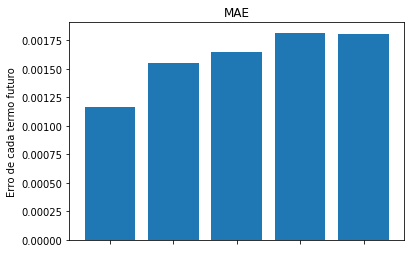

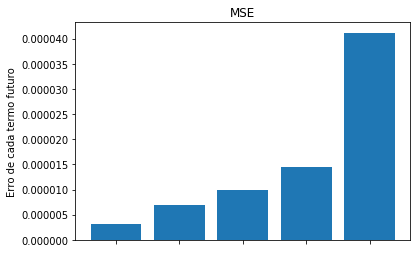

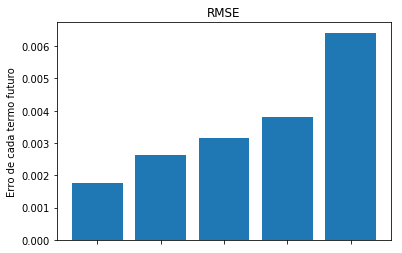

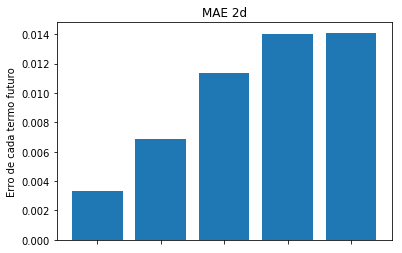

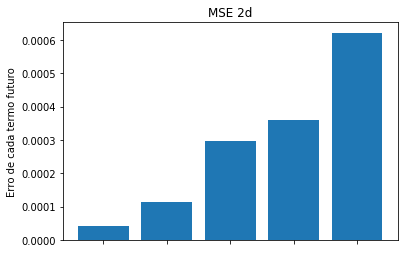

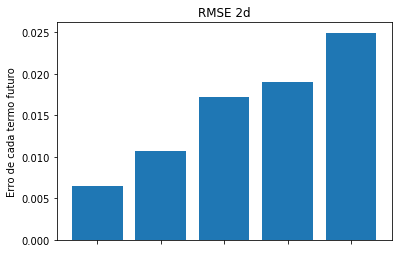

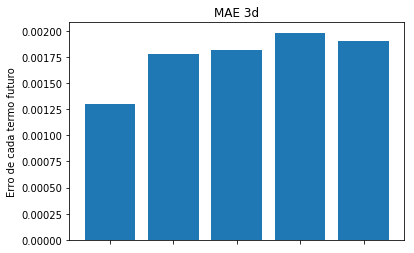

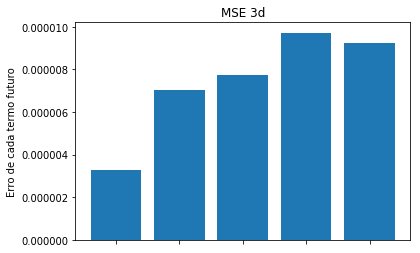

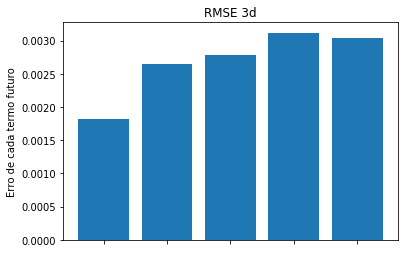

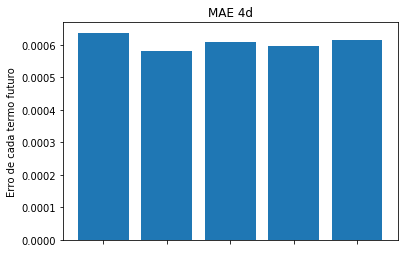

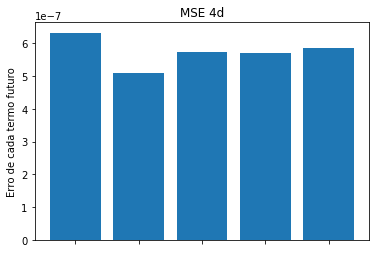

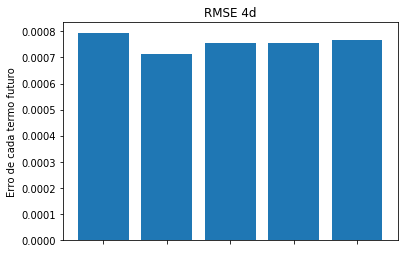

In [12]:

label = []

#plt.figure(figsize=(10,3))
index = np.arange(len(mae))
plt.bar(index, mae)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE')
plt.ylabel('Erro de cada termo futuro')
plt.show()

#plt.figure(figsize=(10,3))
index = np.arange(len(mse))
plt.bar(index, mse)
plt.xticks(index,label, fontsize=5, rotation=30)
plt.title('MSE')
plt.ylabel('Erro de cada termo futuro')
plt.show()

#plt.figure(figsize=(10,3))
index = np.arange(len(rmse))
plt.bar(index, rmse)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE')
plt.ylabel('Erro de cada termo futuro')
plt.show()

#plt.figure(figsize=(10,3))
index = np.arange(len(mae2d))
plt.bar(index, mae2d)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE 2d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

#plt.figure(figsize=(10,3))
index = np.arange(len(mse2d))
plt.bar(index, mse2d)
plt.xticks(index,label, fontsize=5, rotation=30)
plt.title('MSE 2d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

#plt.figure(figsize=(10,3))
index = np.arange(len(rmse2d))
plt.bar(index, rmse2d)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE 2d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

#plt.figure(figsize=(10,3))
index = np.arange(len(mae3d))
plt.bar(index, mae3d)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE 3d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

#plt.figure(figsize=(10,3))
index = np.arange(len(mse3d))
plt.bar(index, mse3d)
plt.xticks(index,label, fontsize=5, rotation=30)
plt.title('MSE 3d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

#plt.figure(figsize=(10,3))
index = np.arange(len(rmse3d))
plt.bar(index, rmse3d)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE 3d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

#plt.figure(figsize=(10,3))
index = np.arange(len(mae4d))
plt.bar(index, mae4d)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE 4d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

#plt.figure(figsize=(10,3))
index = np.arange(len(mse4d))
plt.bar(index, mse4d)
plt.xticks(index,label, fontsize=5, rotation=30)
plt.title('MSE 4d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

#plt.figure(figsize=(10,3))
index = np.arange(len(rmse4d))
plt.bar(index, rmse4d)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE 4d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

    

In [13]:
for i in range(FUTUREerror.shape[0]):
    #print(FUTUREerror[i],menor[i,3])
    b = FUTUREerror[i]**2
    menor[i,3] = np.sqrt(np.sum(b)/5)

[33. 14. 11.  7. 13.  9.  6. 16. 12. 26.] [1646.  721.  606.  541.  537.  495.  558.  622.  754. 1645.] [596. 297. 195. 157. 178. 184. 168. 189. 236. 558.]
[0.20630892 0.09363669 0.07360406 0.063905   0.06598985 0.06236403
 0.06635243 0.07496374 0.09082669 0.20204859] [0.2244898  0.0952381  0.07482993 0.04761905 0.08843537 0.06122449
 0.04081633 0.10884354 0.08163265 0.17687075] [0.20258462 0.08873846 0.07458462 0.06658462 0.06609231 0.06092308
 0.06867692 0.07655385 0.0928     0.20246154] [0.21609862 0.10768673 0.07070341 0.05692531 0.06453952 0.06671501
 0.06091371 0.06852792 0.08556925 0.20232052]
oi [1.08812453 1.01710229 1.01665494 0.74515366 1.34013605 0.98172757
 0.61514442 1.4519491  0.89877388 0.87538721] [0.98194792 0.94768897 1.01332202 1.04193117 1.00155266 0.97689445
 1.03503253 1.02121165 1.02172615 1.00204383] [1.04745167 1.1500484  0.96059113 0.89078014 0.97802198 1.06976744
 0.91803279 0.91414752 0.94211577 1.0013459 ]


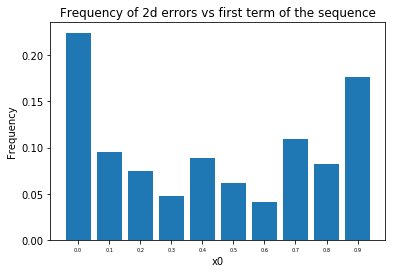

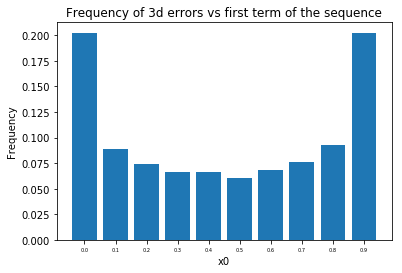

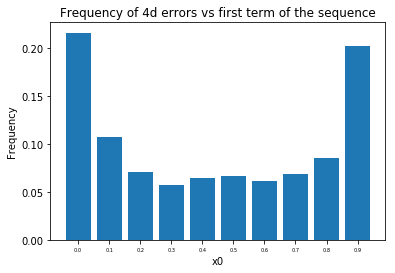

oi [1.08812453 1.01710229 1.01665494 0.74515366 1.34013605 0.98172757
 0.61514442 1.4519491  0.89877388 0.87538721] [0.98194792 0.94768897 1.01332202 1.04193117 1.00155266 0.97689445
 1.03503253 1.02121165 1.02172615 1.00204383] [1.04745167 1.1500484  0.96059113 0.89078014 0.97802198 1.06976744
 0.91803279 0.91414752 0.94211577 1.0013459 ]


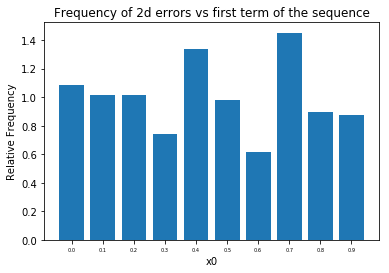

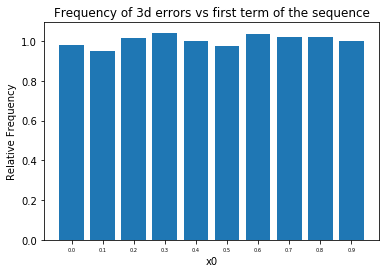

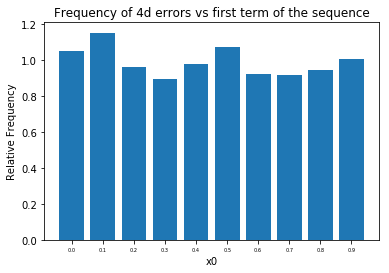

In [14]:
div = 10

cont = np.zeros((div))
cont2d = np.zeros((div))
cont3d = np.zeros((div))
cont4d = np.zeros((div))

for i in range(menor.shape[0]):
    cla = int((list_of_x0[i]*div**2)/div)
    cont[cla] +=1
    if menor[i,3]<0.1 and menor[i,3]>0.01:
        cont2d[cla] +=1
    elif menor[i,3]<0.01 and menor[i,3]>0.001:
        cont3d[cla] +=1
    elif menor[i,3]<0.001:
        cont4d[cla] +=1
        
print(cont2d,cont3d,cont4d)


freq_cont = np.zeros((div))
freq_cont2d = np.zeros((div))
freq_cont3d = np.zeros((div))
freq_cont4d = np.zeros((div))

freq_cont = cont/np.sum(cont)
freq_cont2d = cont2d/np.sum(cont2d)
freq_cont3d = cont3d/np.sum(cont3d)
freq_cont4d = cont4d/np.sum(cont4d)

print(freq_cont,freq_cont2d,freq_cont3d,freq_cont4d)

ind = np.arange(div)

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont2d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont3d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont4d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont2d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont3d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont4d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

[15.  2.  3.  3.  1.  4.  0.  3.  0.  2.  3.  1.  2.  0.  1.  2.  3.  0.
  1.  1.  1.  2.  2.  0.  0.  1.  1.  2.  1.  1.  0.  2.  0.  0.  2.  0.
  0.  2.  1.  0.  2.  0.  1.  3.  1.  0.  1.  1.  1.  3.  1.  2.  0.  0.
  2.  1.  1.  1.  1.  0.  0.  0.  1.  2.  0.  1.  1.  0.  0.  1.  0.  5.
  1.  3.  2.  1.  1.  0.  1.  2.  1.  1.  1.  0.  0.  0.  4.  2.  2.  1.
  0.  2.  3.  1.  2.  3.  3.  1.  4.  7.] [491. 216. 172. 152. 134. 104. 107. 100.  80.  90.  81.  89.  83.  70.
  63.  71.  63.  70.  73.  58.  72.  63.  51.  62.  64.  81.  51.  65.
  45.  52.  58.  61.  56.  55.  47.  50.  70.  38.  46.  60.  54.  63.
  60.  57.  42.  55.  54.  54.  49.  49.  56.  41.  49.  42.  56.  43.
  46.  67.  45.  50.  47.  62.  69.  55.  49.  55.  51.  62.  58.  50.
  71.  67.  53.  60.  71.  67.  66.  61.  54.  52.  68.  70.  81.  91.
  67.  72.  69.  74.  83.  79.  85.  80.  97.  91. 112. 129. 148. 158.
 204. 541.] [177.  76.  65.  52.  53.  43.  42.  23.  29.  36.  32.  30.  27.  34.
  46.  23.  2

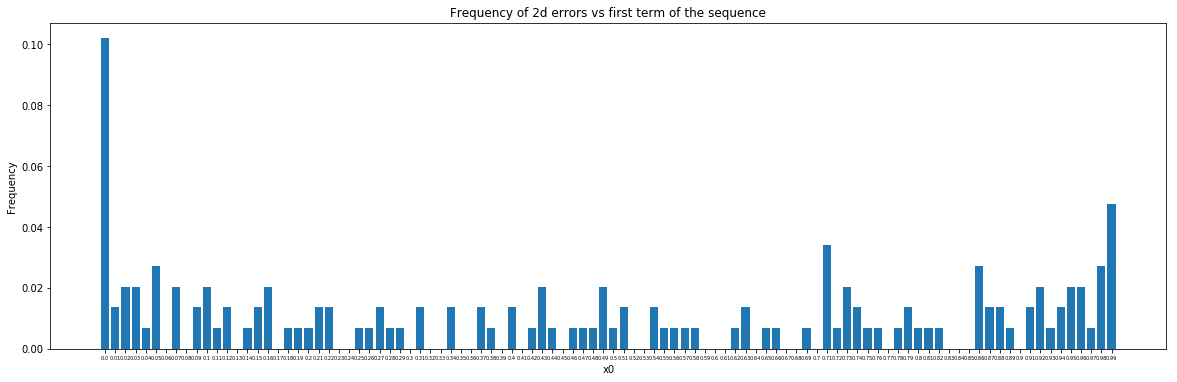

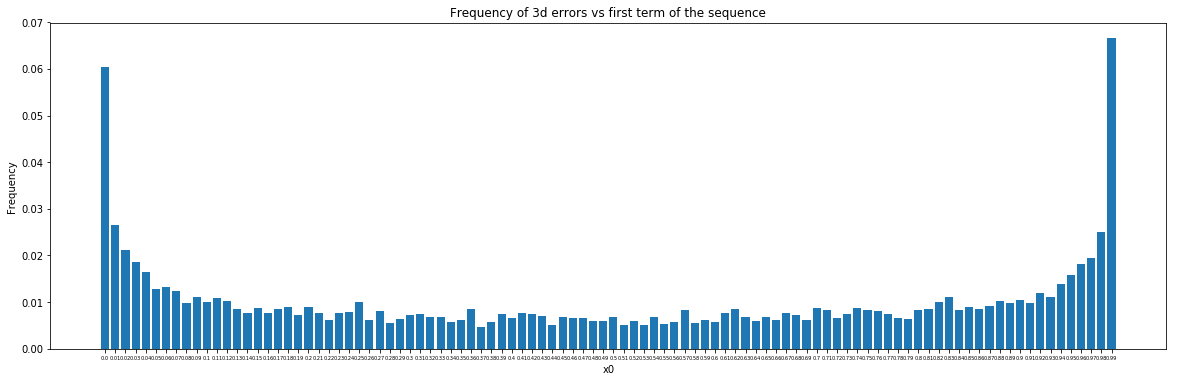

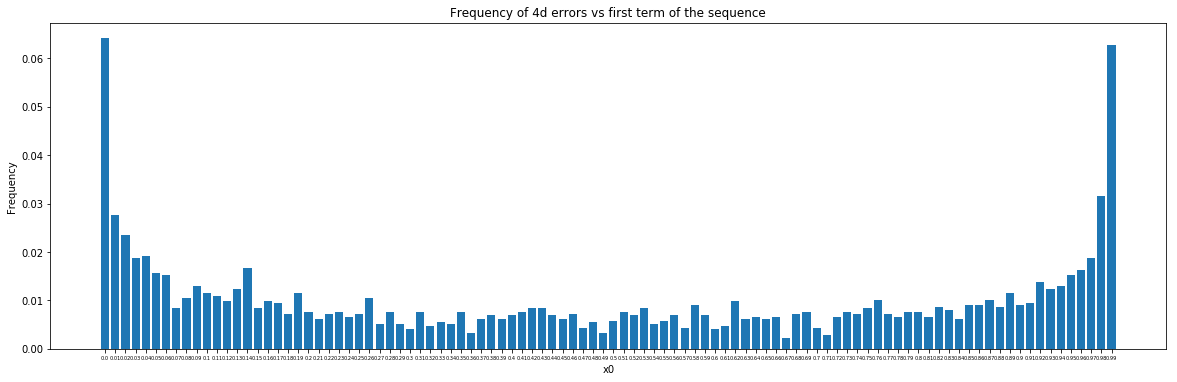

oi [1.64819076 0.51052802 0.93809524 1.08764665 0.39918946 1.97493734
 0.         1.78684807 0.         1.17261905 1.9408867  0.62022826
 1.34013605 0.         0.68225108 1.56349206 2.42089094 0.
 0.79837893 0.82469911 0.79837893 1.83042973 2.05609915 0.
 0.         0.73576097 0.92651382 1.85302763 1.12011372 1.12011372
 0.         1.78684807 0.         0.         2.3824641  0.
 0.         2.63324979 1.13708514 0.         2.00126984 0.
 0.89342404 2.71256454 1.21044547 0.         1.00063492 1.12011372
 1.15457875 3.69086651 1.02804958 2.3452381  0.         0.
 2.08465608 1.25079365 1.13708514 0.93809524 1.05700872 0.
 0.         0.         0.77368679 2.02831403 0.         1.02804958
 1.07210884 0.         0.         1.04232804 0.         4.69047619
 1.04232804 2.68027211 1.61392729 0.82469911 0.78997494 0.
 1.02804958 2.00126984 0.83386243 0.84323167 0.70799641 0.
 0.         0.         3.06316812 1.44322344 1.37702053 0.67006803
 0.         1.38977072 1.63146998 0.59561602 1.00063492 

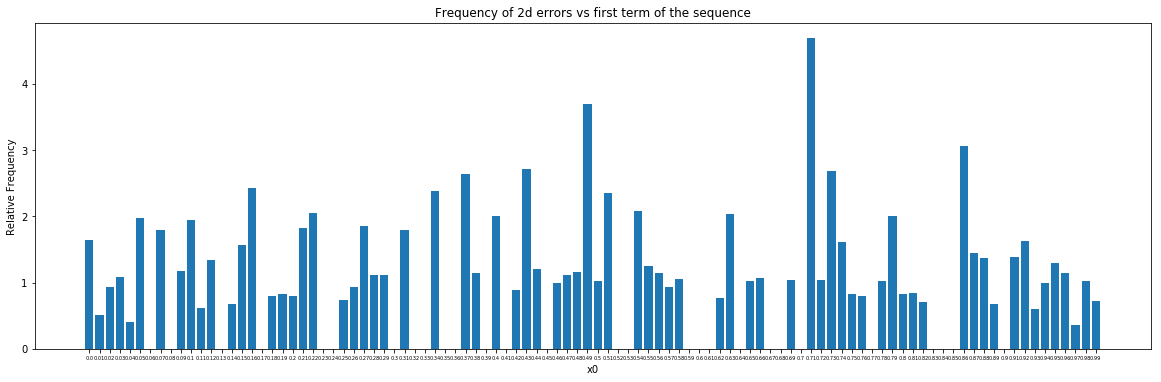

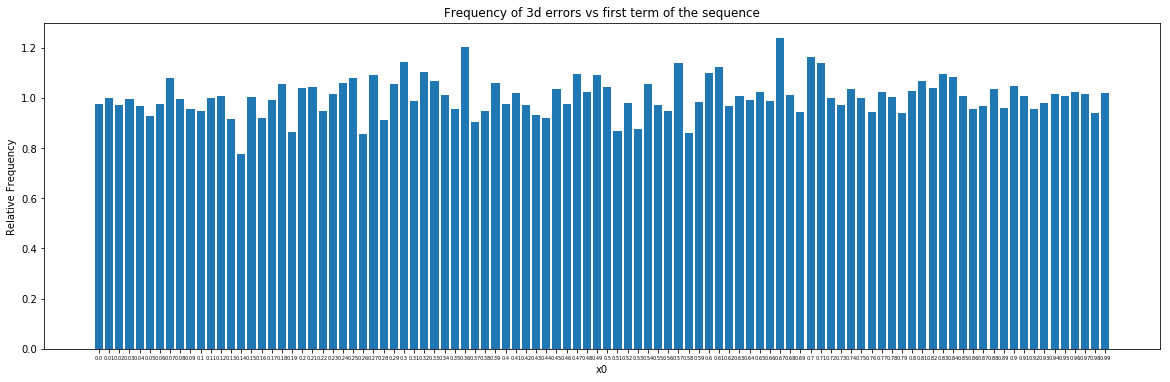

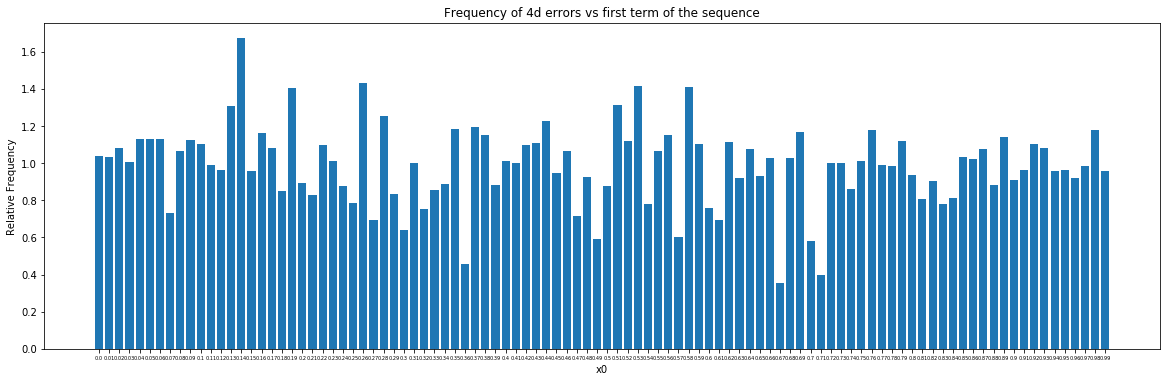

In [15]:
div = 100

cont = np.zeros((div))
cont2d = np.zeros((div))
cont3d = np.zeros((div))
cont4d = np.zeros((div))

for i in range(menor.shape[0]):
    cla = int((list_of_x0[i]*div**2)/div)
    cont[cla] +=1
    if menor[i,3]<0.1 and menor[i,3]>0.01:
        cont2d[cla] +=1
    elif menor[i,3]<0.01 and menor[i,3]>0.001:
        cont3d[cla] +=1
    elif menor[i,3]<0.001:
        cont4d[cla] +=1
        
print(cont2d,cont3d,cont4d)


freq_cont = np.zeros((div))
freq_cont2d = np.zeros((div))
freq_cont3d = np.zeros((div))
freq_cont4d = np.zeros((div))

freq_cont = cont/np.sum(cont)
freq_cont2d = cont2d/np.sum(cont2d)
freq_cont3d = cont3d/np.sum(cont3d)
freq_cont4d = cont4d/np.sum(cont4d)

print(freq_cont,freq_cont2d,freq_cont3d,freq_cont4d)

ind = np.arange(div)

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont2d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont3d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont4d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont2d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont3d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont4d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

[4. 3. 3. 0. 1. 1. 2. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.
 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 1. 2. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 2. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

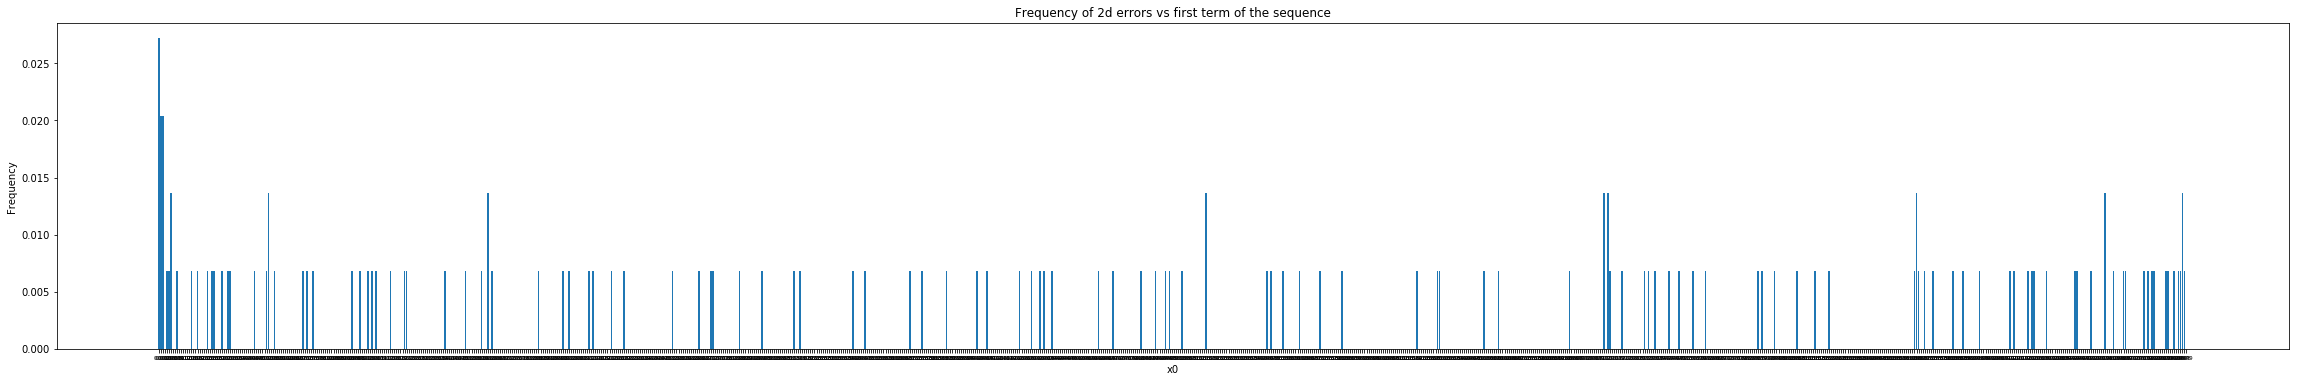

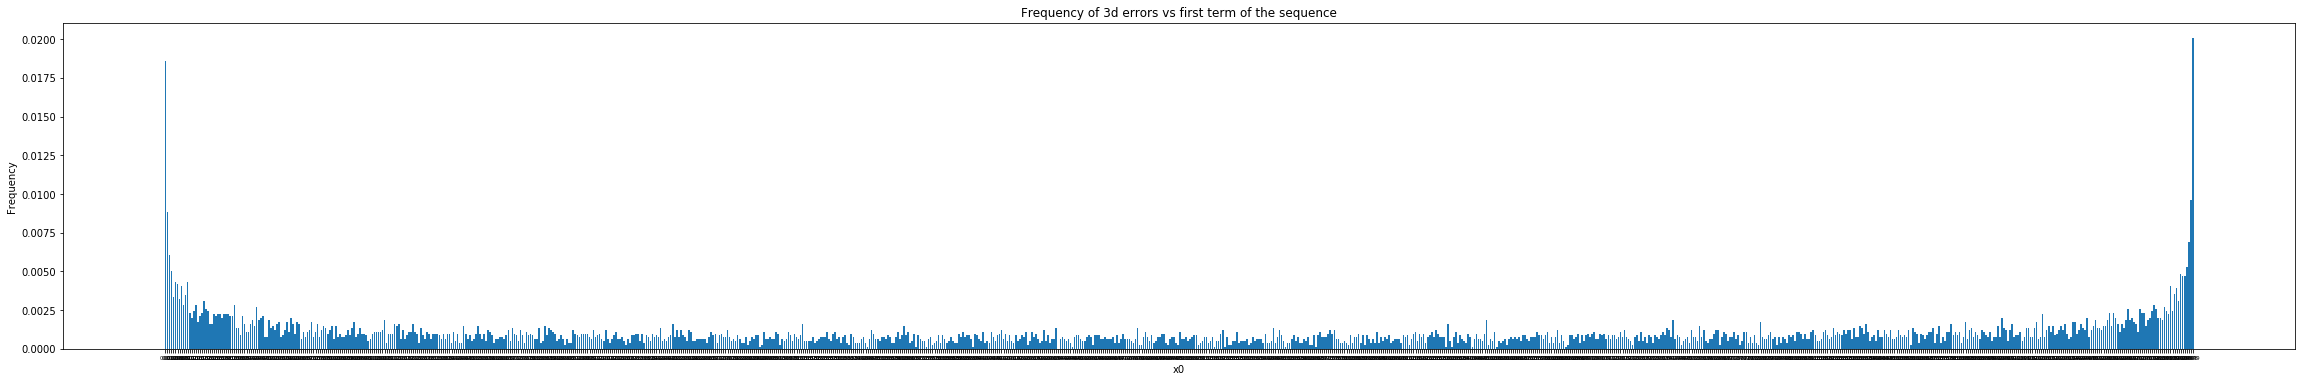

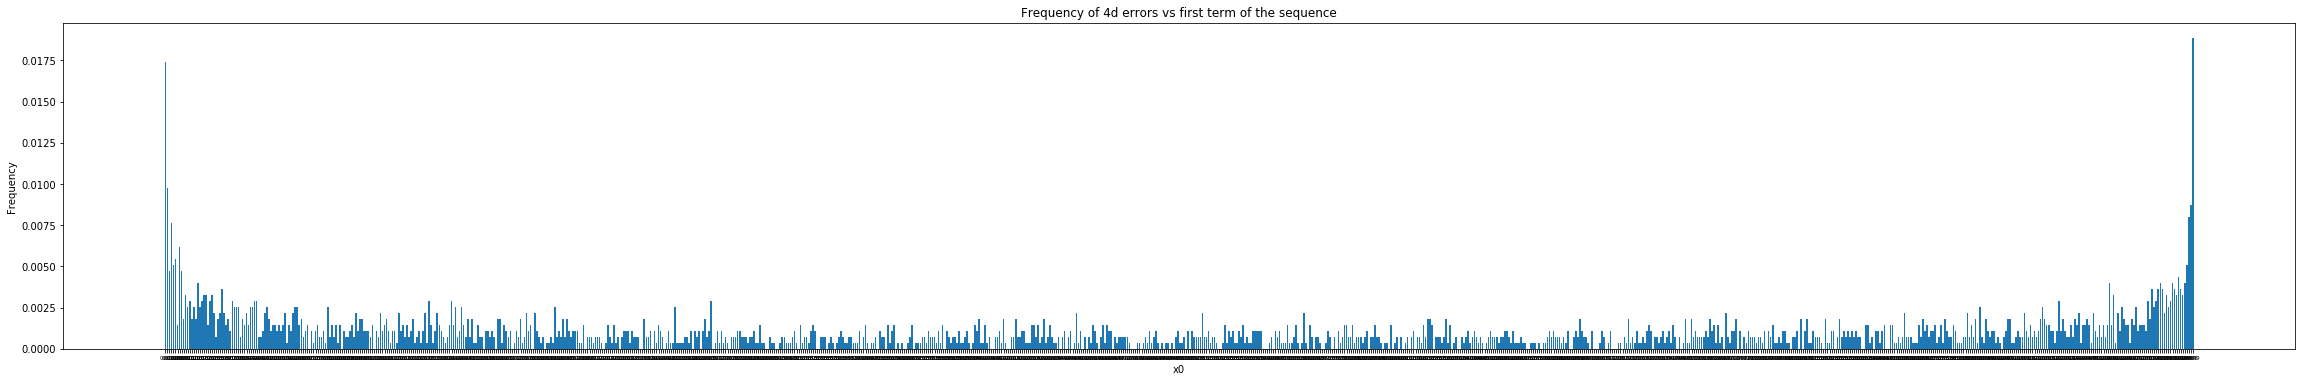

oi [ 1.47877082  2.20728291  3.46373626  0.          1.78684807  1.47152194
  3.75238095  0.          0.          2.58784893  0.          0.
  0.          0.          0.          0.          2.88644689  0.
  0.          2.14421769  0.          0.          0.          0.
  3.00190476  0.          3.12698413  3.00190476  0.          0.
  0.          3.12698413  0.          0.          2.42089094  3.94987469
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          3.94987469
  0.          0.          0.          0.          0.          4.41456583
  9.38095238  0.          0.          7.5047619   0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          6.82251082
  0.          9.38095238  0.          0.          8.33862434  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.       

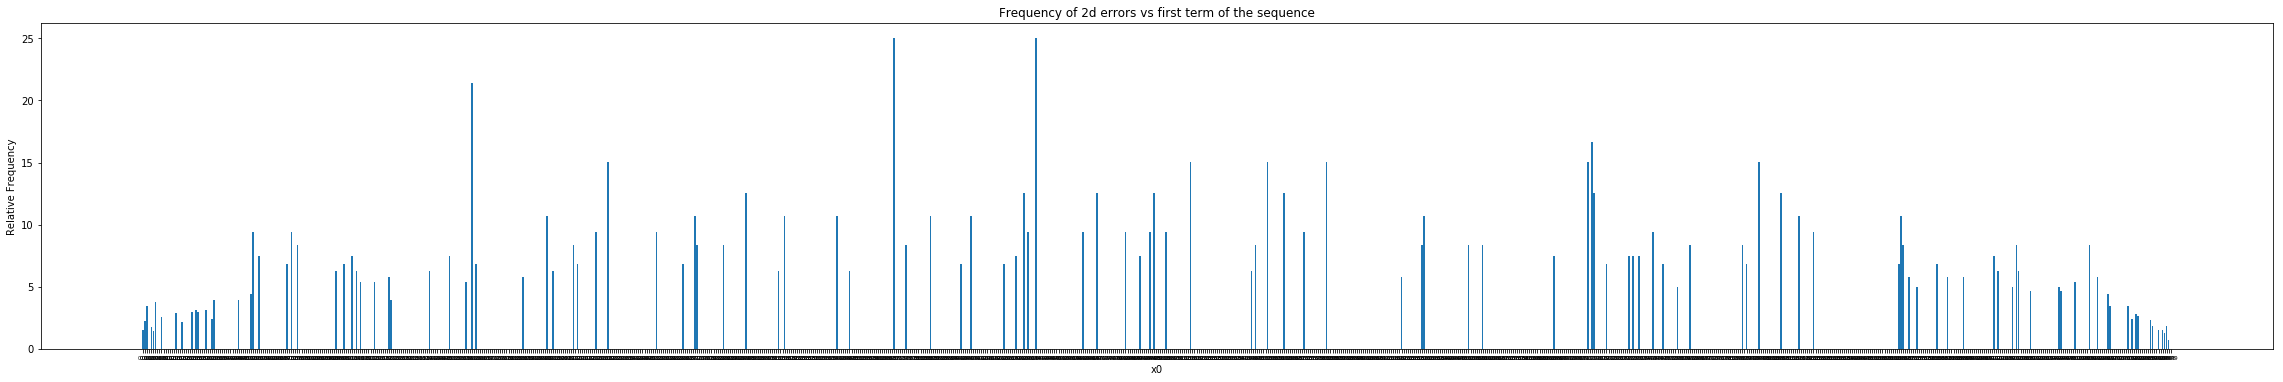

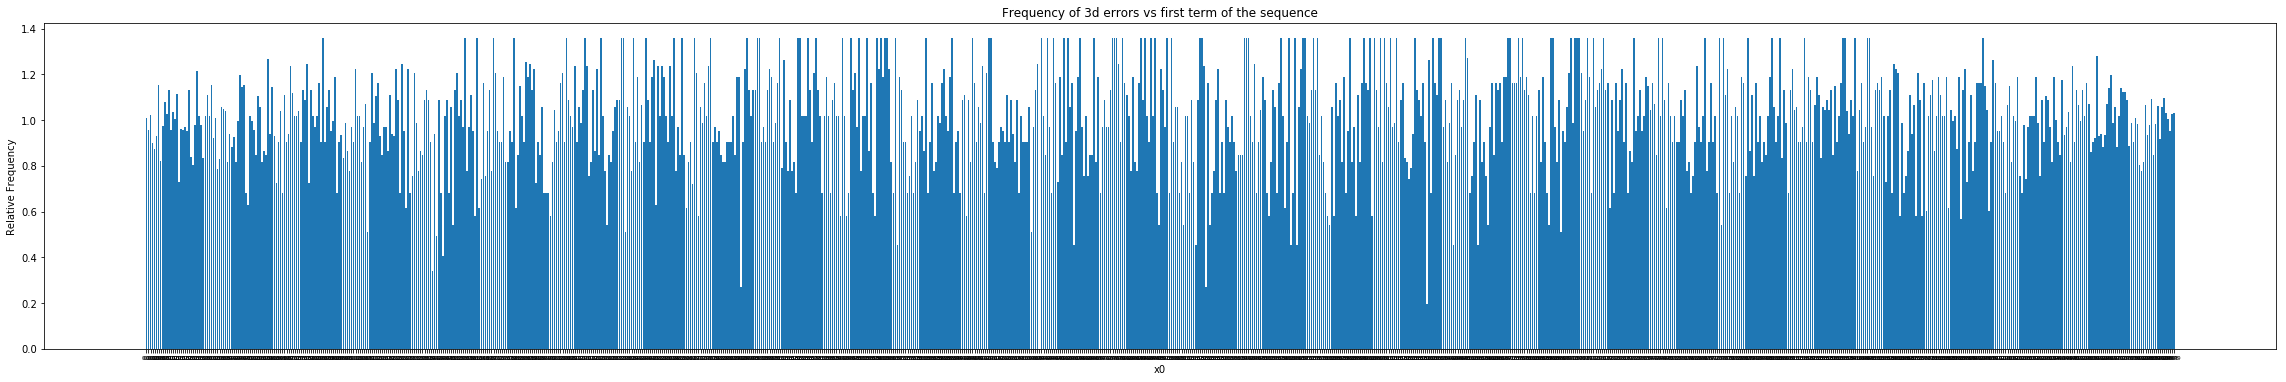

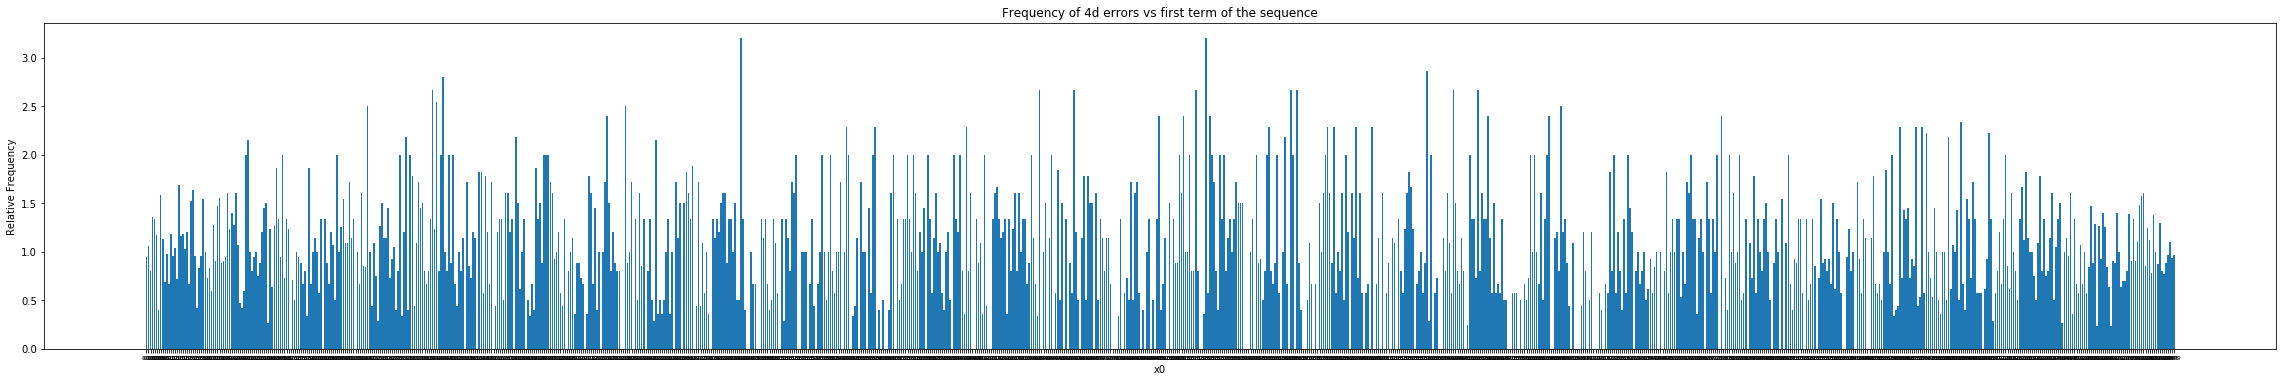

In [16]:
div = 1000

cont = np.zeros((div))
cont2d = np.zeros((div))
cont3d = np.zeros((div))
cont4d = np.zeros((div))

for i in range(menor.shape[0]):
    cla = int((list_of_x0[i]*div**2)/div)
    cont[cla] +=1
    if menor[i,3]<0.1 and menor[i,3]>0.01:
        cont2d[cla] +=1
    elif menor[i,3]<0.01 and menor[i,3]>0.001:
        cont3d[cla] +=1
    elif menor[i,3]<0.001:
        cont4d[cla] +=1
        
print(cont2d,cont3d,cont4d)


freq_cont = np.zeros((div))
freq_cont2d = np.zeros((div))
freq_cont3d = np.zeros((div))
freq_cont4d = np.zeros((div))

freq_cont = cont/np.sum(cont)
freq_cont2d = cont2d/np.sum(cont2d)
freq_cont3d = cont3d/np.sum(cont3d)
freq_cont4d = cont4d/np.sum(cont4d)

print(freq_cont,freq_cont2d,freq_cont3d,freq_cont4d)

ind = np.arange(div)

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont2d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont3d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont4d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont2d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont3d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont4d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

mae [0.0011629850369868457, 0.0015497088683687436, 0.0016473777360431925, 0.0018164504932570648] 
 mse [3.1485063072794244e-06, 6.837525400481186e-06, 9.960266386871372e-06, 1.4513764893103862e-05] 
 rmse [0.0017744030847807453, 0.0026148662299401064, 0.003155988971284813, 0.003809693543200537] 

mae [0.0033040950494735628, 0.00684690790464442, 0.011357359614414383, 0.01398965889769852] 
 mse [4.229718411050483e-05, 0.00011503061826350452, 0.0002964248742759203, 0.00035937002567267793] 
 rmse [0.00650362853417266, 0.010725232783651109, 0.017216993764183116, 0.018957057410702693] 

mae [0.0013025122754986497, 0.0017807288190308085, 0.0018170950873229233, 0.001982729322022667] 
 mse [3.294473992691603e-06, 7.015699800201891e-06, 7.735666002131651e-06, 9.7204484898118e-06] 
 rmse [0.0018150685917318946, 0.002648716632673622, 0.0027813065278986513, 0.0031177633793814117] 

mae [0.0013025122754986497, 0.0017807288190308085, 0.0018170950873229233, 0.001982729322022667] 
 mse [3.2944739926916

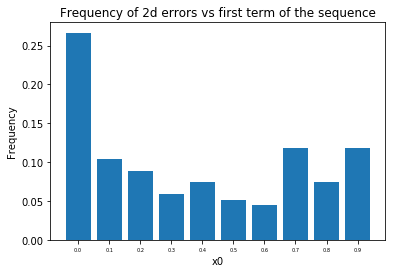

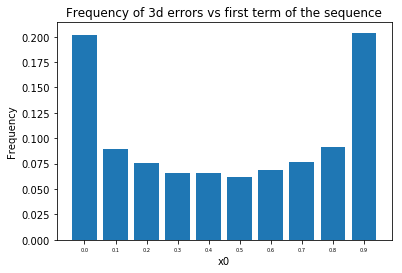

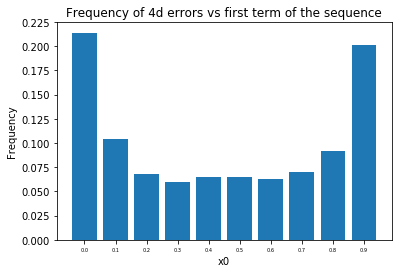

oi [1.29256005 1.10751138 1.20766284 0.92730234 1.12250712 0.83143842
 0.66982392 1.58101124 0.81555408 0.58658425] [0.97974641 0.95308747 1.03070211 1.02857922 1.00198853 0.98525591
 1.02979555 1.01720606 1.00116732 1.00940611] [1.03639153 1.10835217 0.91735564 0.93429551 0.99004497 1.04259325
 0.94223434 0.93407666 1.00497473 0.99481178]


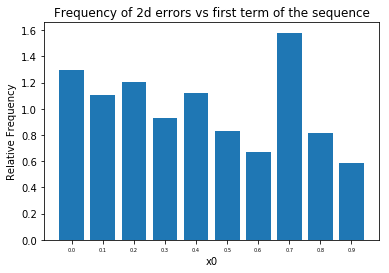

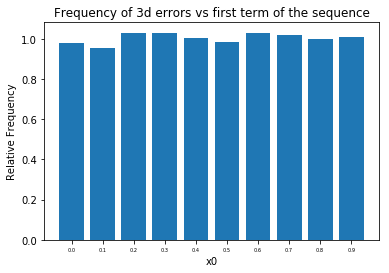

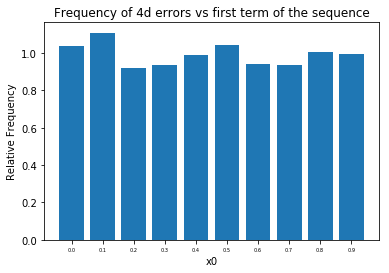

[11.  2.  5.  4.  2.  6.  0.  3.  1.  2.  3.  1.  2.  0.  0.  2.  2.  1.
  1.  2.  1.  2.  1.  0.  0.  1.  2.  2.  2.  1.  0.  2.  0.  0.  2.  0.
  0.  2.  1.  1.  1.  0.  1.  2.  0.  0.  2.  0.  1.  3.  1.  1.  0.  0.
  1.  2.  1.  1.  0.  0.  0.  1.  1.  2.  0.  1.  0.  0.  0.  1.  0.  4.
  1.  4.  2.  1.  1.  0.  1.  2.  1.  1.  1.  0.  0.  0.  3.  1.  2.  1.
  0.  1.  2.  0.  1.  1.  0.  1.  4.  6.] [465. 204. 168. 139. 124. 101. 102.  92.  76.  85.  78.  87.  80.  67.
  62.  67.  61.  64.  68.  53.  69.  63.  51.  59.  58.  77.  49.  62.
  46.  50.  51.  61.  52.  51.  41.  51.  67.  35.  41.  56.  53.  62.
  55.  57.  43.  47.  51.  51.  48.  42.  51.  43.  49.  40.  54.  38.
  45.  59.  47.  47.  38.  59.  61.  51.  45.  54.  55.  58.  56.  49.
  66.  64.  50.  57.  67.  60.  57.  60.  51.  55.  65.  67.  73.  83.
  65.  64.  66.  69.  77.  71.  81.  79.  91.  92.  98. 131. 149. 150.
 196. 503.] [207.  88.  67.  64.  62.  45.  47.  31.  32.  41.  35.  33.  30.  37.
  48.  27.  3

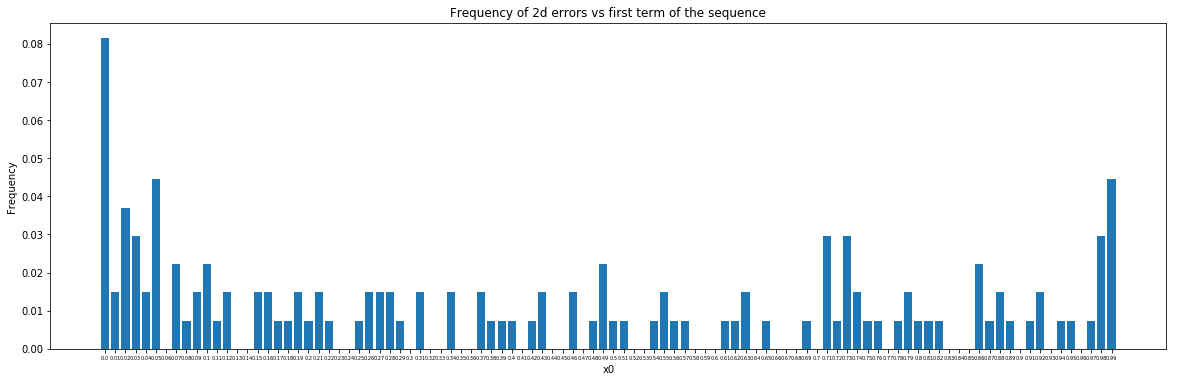

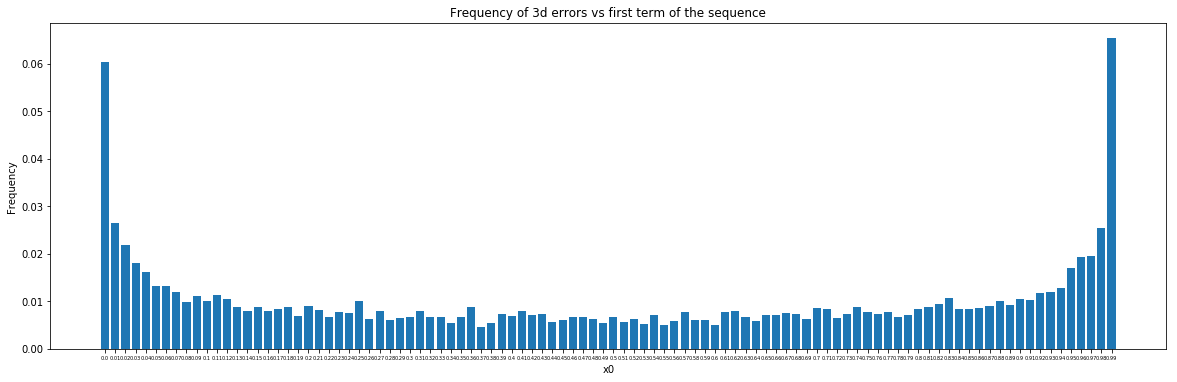

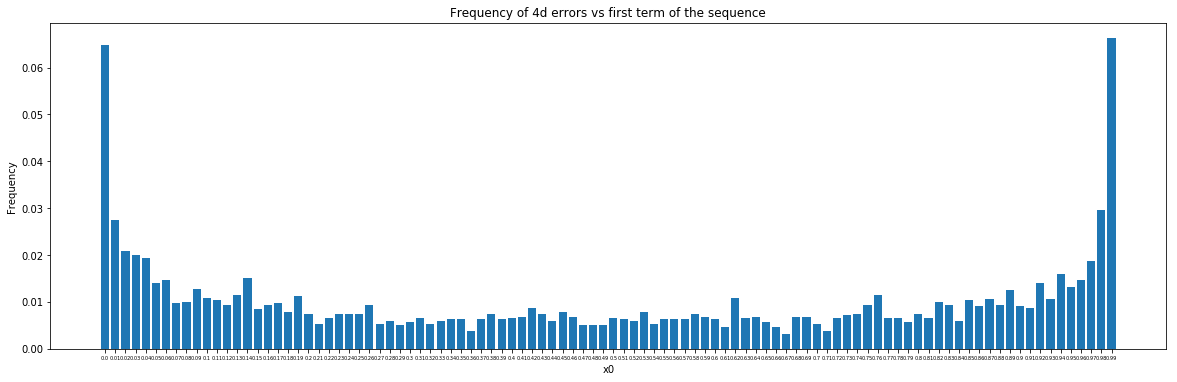

oi [1.31611084 0.55590829 1.70246914 1.57910181 0.86934594 3.22573099
 0.         1.94567901 0.74971118 1.27685185 2.11340996 0.67535966
 1.45925926 0.         0.         1.70246914 1.7573875  0.85123457
 0.86934594 1.7960114  0.86934594 1.9931346  1.11943176 0.
 0.         0.80116195 2.0177412  2.0177412  2.43935876 1.21967938
 0.         1.94567901 0.         0.         2.59423868 0.
 0.         2.86731644 1.23815937 1.06127946 1.08958025 0.
 0.97283951 1.96912093 0.         0.         2.17916049 0.
 1.25720798 4.01894353 1.11943176 1.27685185 0.         0.
 1.13497942 2.72395062 1.23815937 1.02148148 0.         0.
 0.         1.08958025 0.84245895 2.20860861 0.         1.11943176
 0.         0.         0.         1.13497942 0.         4.08592593
 1.13497942 3.89135802 1.7573875  0.8980057  0.86019493 0.
 1.11943176 2.17916049 0.90798354 0.9181856  0.77092942 0.
 0.         0.         2.5015873  0.78575499 1.49942236 0.72962963
 0.         0.75665295 1.18432636 0.         0.54479012 

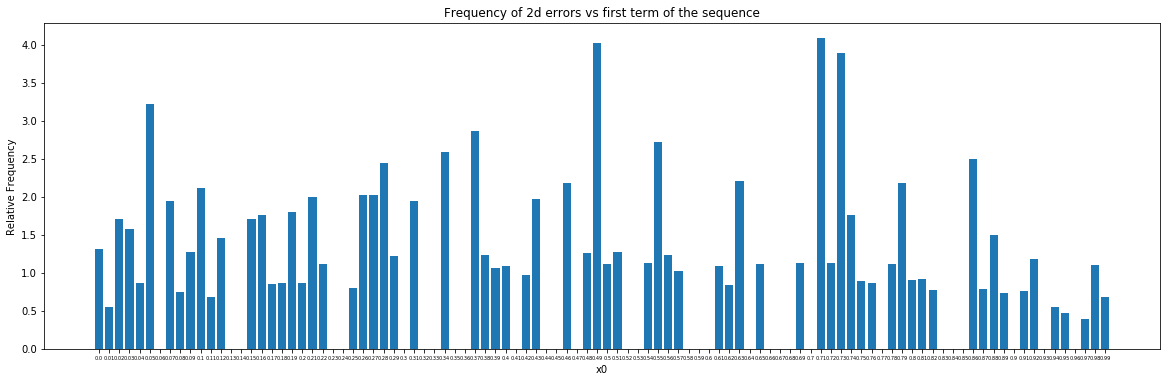

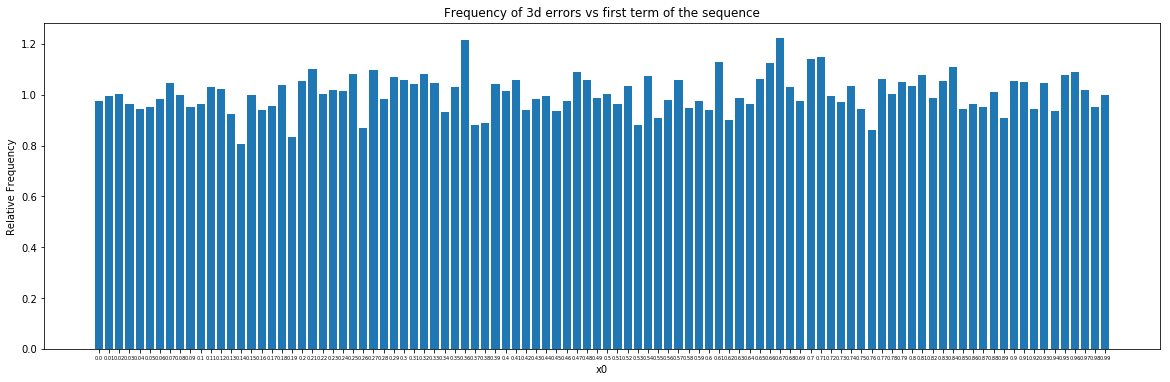

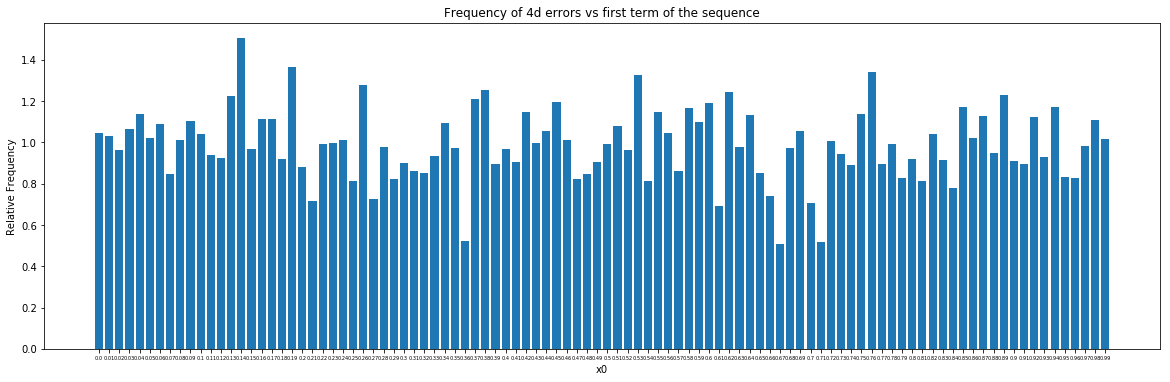

[4. 0. 3. 0. 1. 0. 2. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 2. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 2. 2. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

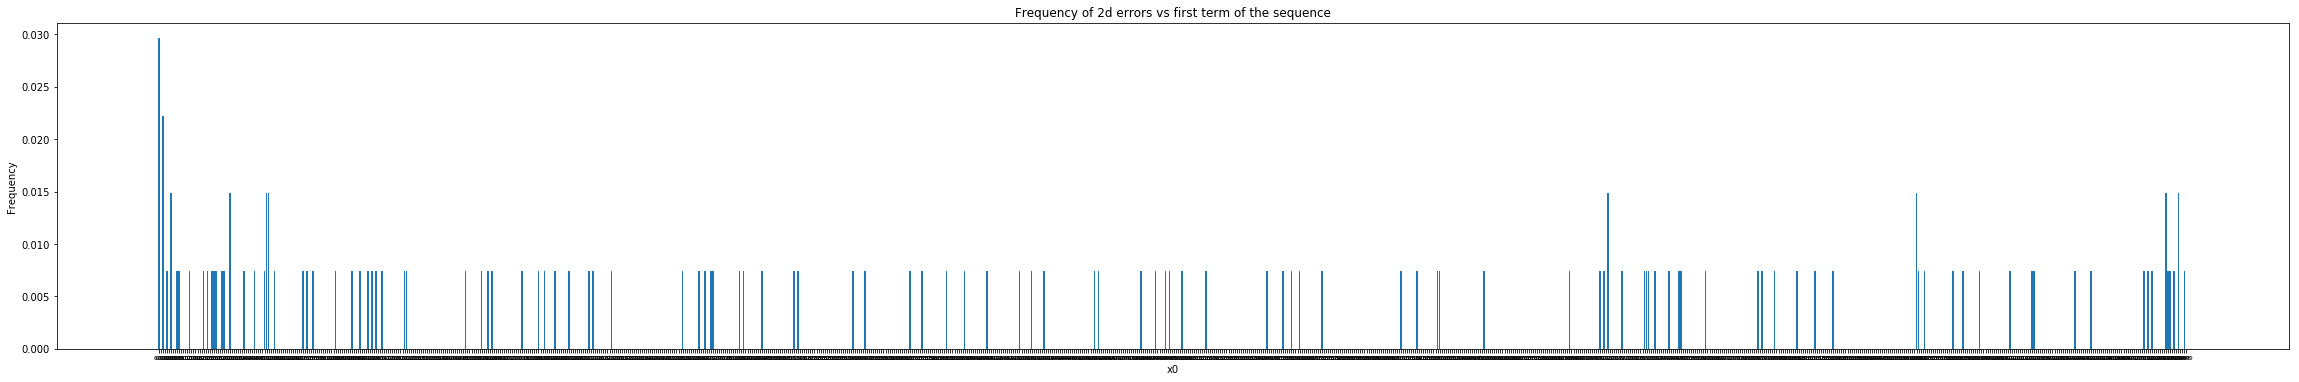

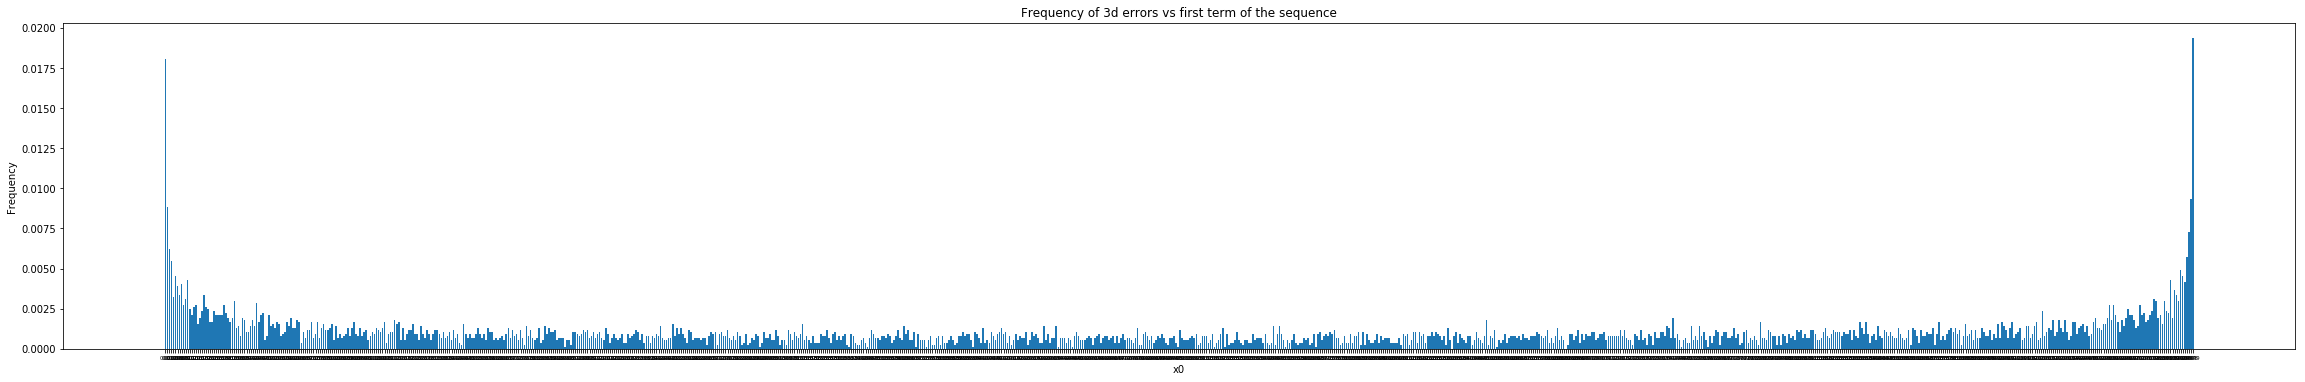

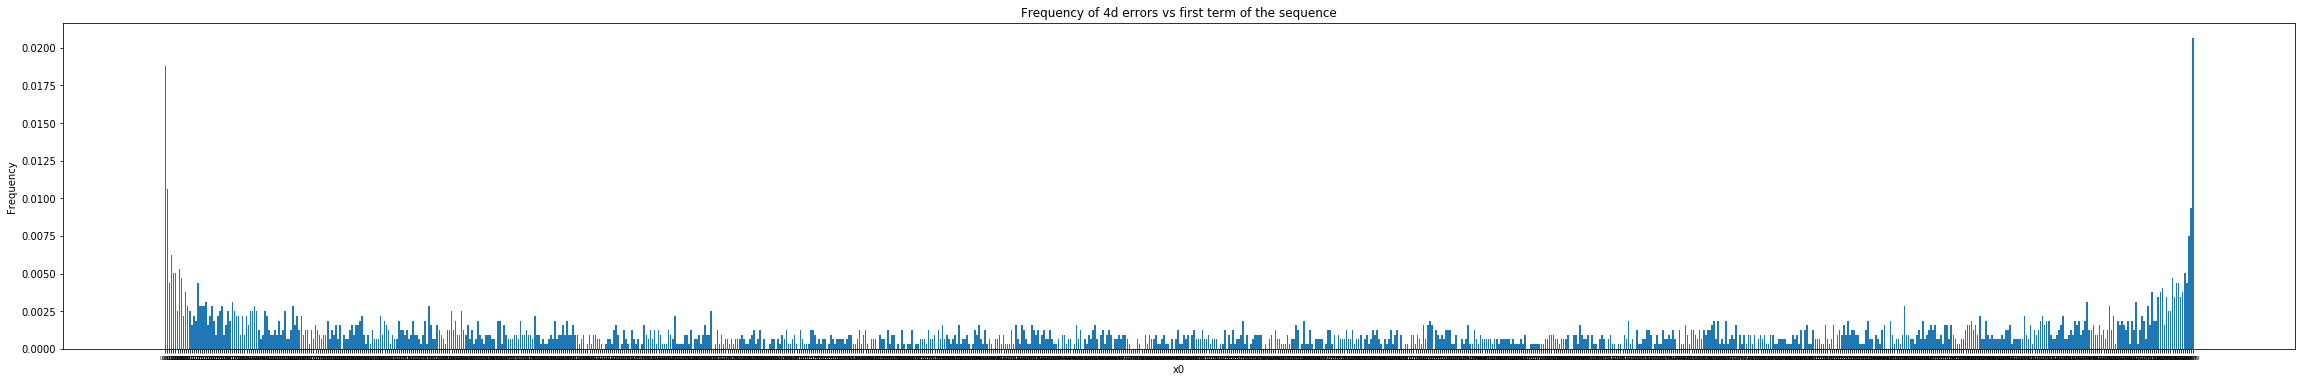

oi [ 1.61021711  0.          3.77162393  0.          1.94567901  0.
  4.08592593  0.          0.          2.81787995  2.20860861  0.
  0.          0.          0.          2.91851852  0.          0.
  0.          0.          0.          0.          3.89135802  0.
  3.26874074  0.          3.40493827  3.26874074  3.14301994  0.
  0.          3.40493827  4.08592593  0.          0.          8.60194932
  0.          0.          0.          0.          0.          0.
  4.08592593  0.          0.          0.          0.          4.30097466
  0.          0.          0.          0.          5.44790123  9.61394336
 10.21481481  0.          0.          8.17185185  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          7.42895623
  0.         10.21481481  0.          0.          9.07983539  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.         13.61975309  0.   

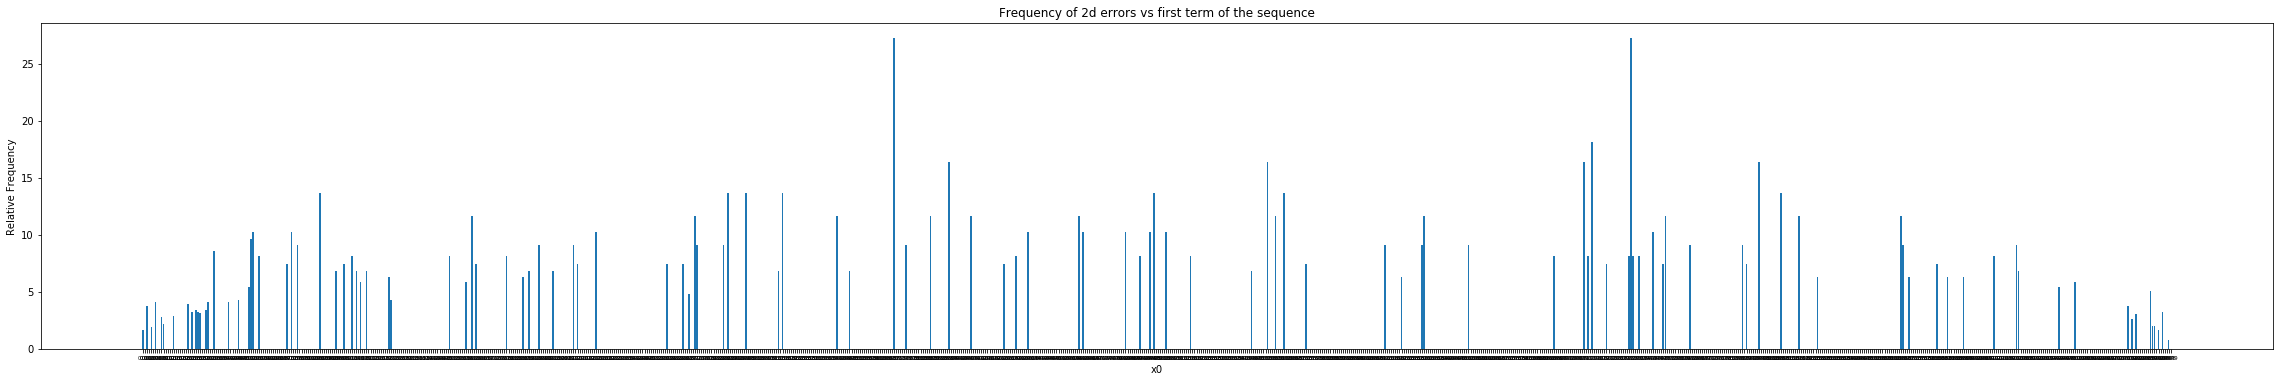

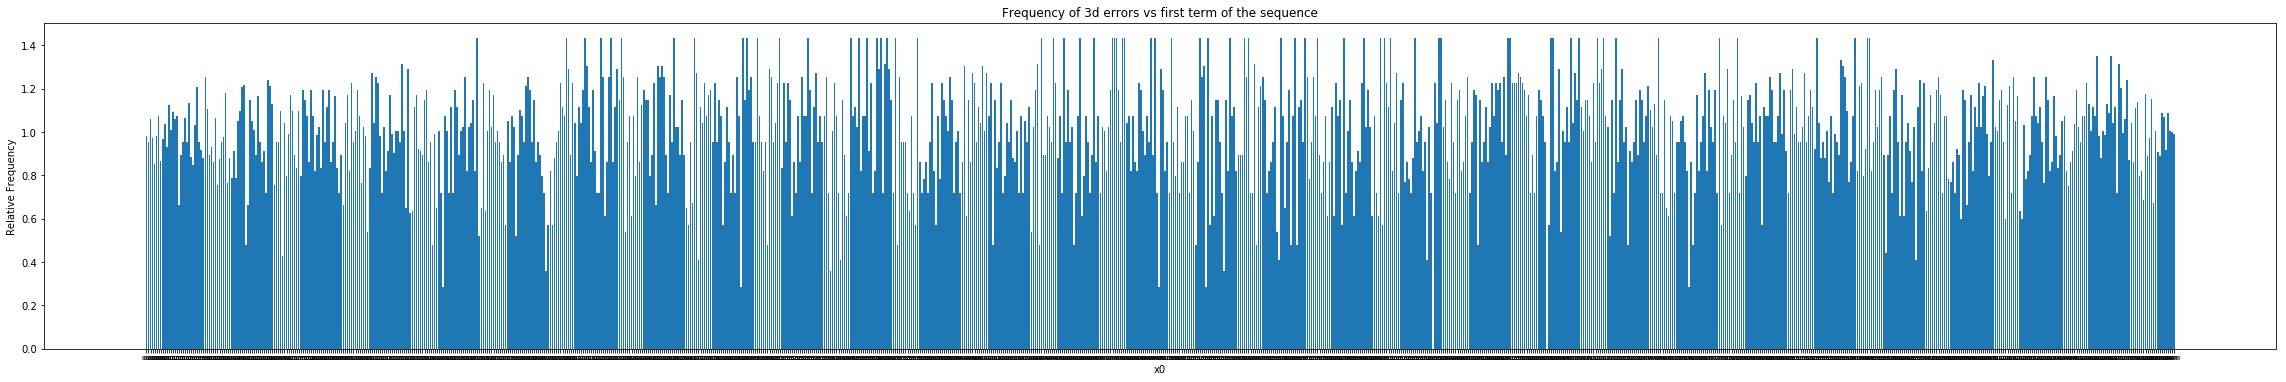

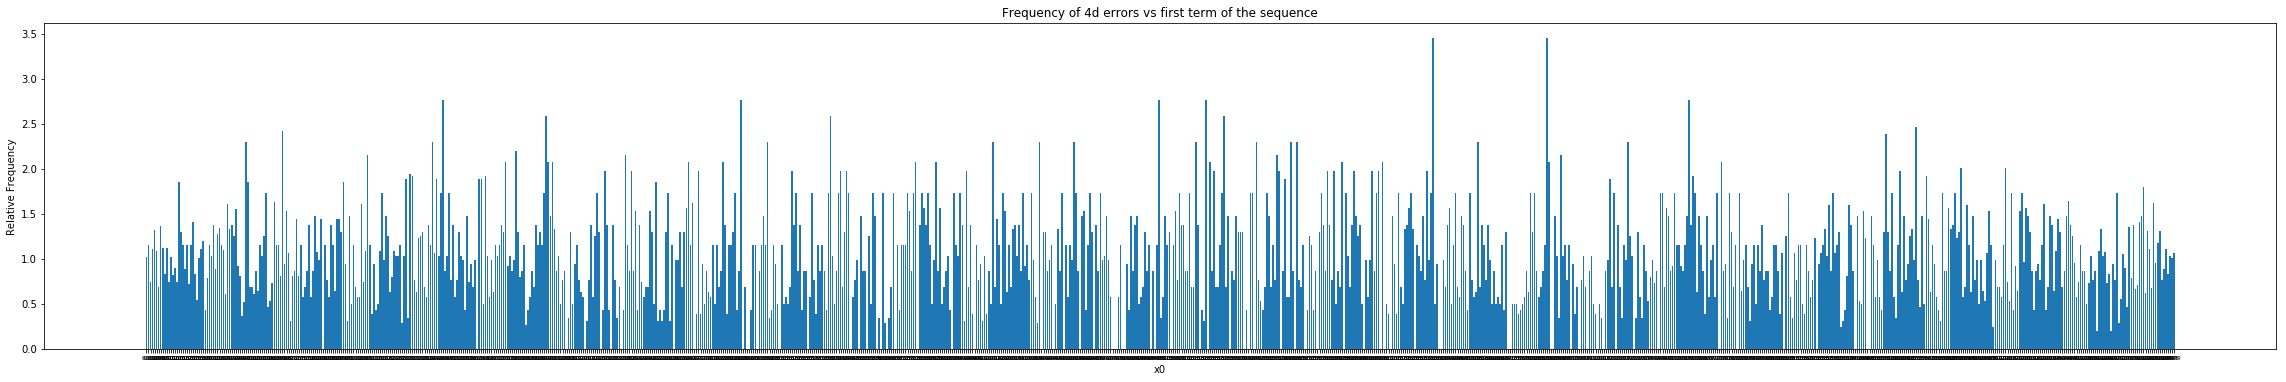

In [17]:
FUTUREerror = FUTUREerror[:,0:4]
FUTUREerror2d = FUTUREerror2d[:,0:4]
FUTUREerror3d = FUTUREerror3d[:,0:4]
FUTUREerror4d = FUTUREerror4d[:,0:4]
mae,mse,rmse = geterrors(FUTUREerror)
mae2d,mse2d,rmse2d = geterrors(FUTUREerror2d)
mae3d,mse3d,rmse3d = geterrors(FUTUREerror3d)
mae4d,mse4d,rmse4d = geterrors(FUTUREerror4d)

print('mae',mae,'\n mse',mse,'\n rmse',rmse,'\n')
print('mae',mae2d,'\n mse',mse2d,'\n rmse',rmse2d,'\n')
print('mae',mae3d,'\n mse',mse3d,'\n rmse',rmse3d,'\n')
print('mae',mae3d,'\n mse',mse3d,'\n rmse',rmse3d,'\n')

for i in range(FUTUREerror.shape[0]):
    b = FUTUREerror[i]**2
    menor[i,3] = np.sqrt(np.sum(b)/4)
    
div = 10

cont = np.zeros((div))
cont2d = np.zeros((div))
cont3d = np.zeros((div))
cont4d = np.zeros((div))

for i in range(menor.shape[0]):
    cla = int((list_of_x0[i]*div**2)/div)
    cont[cla] +=1
    if menor[i,3]<0.1 and menor[i,3]>0.01:
        cont2d[cla] +=1
    elif menor[i,3]<0.01 and menor[i,3]>0.001:
        cont3d[cla] +=1
    elif menor[i,3]<0.001:
        cont4d[cla] +=1
        
print(cont2d,cont3d,cont4d)


freq_cont = np.zeros((div))
freq_cont2d = np.zeros((div))
freq_cont3d = np.zeros((div))
freq_cont4d = np.zeros((div))

freq_cont = cont/np.sum(cont)
freq_cont2d = cont2d/np.sum(cont2d)
freq_cont3d = cont3d/np.sum(cont3d)
freq_cont4d = cont4d/np.sum(cont4d)

print(freq_cont,freq_cont2d,freq_cont3d,freq_cont4d)

ind = np.arange(div)

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont2d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont3d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont4d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont2d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont3d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont4d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

div = 100

cont = np.zeros((div))
cont2d = np.zeros((div))
cont3d = np.zeros((div))
cont4d = np.zeros((div))

for i in range(menor.shape[0]):
    cla = int((list_of_x0[i]*div**2)/div)
    cont[cla] +=1
    if menor[i,3]<0.1 and menor[i,3]>0.01:
        cont2d[cla] +=1
    elif menor[i,3]<0.01 and menor[i,3]>0.001:
        cont3d[cla] +=1
    elif menor[i,3]<0.001:
        cont4d[cla] +=1
        
print(cont2d,cont3d,cont4d)


freq_cont = np.zeros((div))
freq_cont2d = np.zeros((div))
freq_cont3d = np.zeros((div))
freq_cont4d = np.zeros((div))

freq_cont = cont/np.sum(cont)
freq_cont2d = cont2d/np.sum(cont2d)
freq_cont3d = cont3d/np.sum(cont3d)
freq_cont4d = cont4d/np.sum(cont4d)

print(freq_cont,freq_cont2d,freq_cont3d,freq_cont4d)

ind = np.arange(div)

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont2d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont3d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont4d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont2d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont3d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont4d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

div = 1000

cont = np.zeros((div))
cont2d = np.zeros((div))
cont3d = np.zeros((div))
cont4d = np.zeros((div))

for i in range(menor.shape[0]):
    cla = int((list_of_x0[i]*div**2)/div)
    cont[cla] +=1
    if menor[i,3]<0.1 and menor[i,3]>0.01:
        cont2d[cla] +=1
    elif menor[i,3]<0.01 and menor[i,3]>0.001:
        cont3d[cla] +=1
    elif menor[i,3]<0.001:
        cont4d[cla] +=1
        
print(cont2d,cont3d,cont4d)


freq_cont = np.zeros((div))
freq_cont2d = np.zeros((div))
freq_cont3d = np.zeros((div))
freq_cont4d = np.zeros((div))

freq_cont = cont/np.sum(cont)
freq_cont2d = cont2d/np.sum(cont2d)
freq_cont3d = cont3d/np.sum(cont3d)
freq_cont4d = cont4d/np.sum(cont4d)

print(freq_cont,freq_cont2d,freq_cont3d,freq_cont4d)

ind = np.arange(div)

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont2d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont3d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont4d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont2d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont3d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont4d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()